# Project: Identify Customer Segments


## Table of Contents
<ul>
  <li><a href="#step0">Step 0: Load the Data</a></li>
  <li><a href="#step1">Step 1: Preprocessing</a>
    <ul>
      <li><a href="#step1.1">Step 1.1: Assess Missing Data</a></li>
      <li><a href="#step1.2">Step 1.2: Select and Re-Encode Features</a></li>
      <li><a href="#step1.3">Step 1.3: Create a Cleaning Function</a></li>
    </ul>
  </li>
  <li><a href="#step2">Step 2: Feature Transformation</a>
    <ul>
      <li><a href="#step2.1">Step 2.1: Apply Feature Scaling</a></li>
      <li><a href="#step2.2">Step 2.2: Perform Dimensionality Reduction</a></li>
      <li><a href="#step2.3">Step 2.3: Interpret Principal Components</a></li>
    </ul>
   </li>
   <li><a href="#step3">Step 3: Clustering</a>
    <ul>
      <li><a href="#step3.1">Step 3.1: Apply Clustering to General Population</a></li>
      <li><a href="#step3.2">Step 3.2: Apply All Steps to the Customer Data</a></li>
      <li><a href="#step3.3">Step 3.3: Compare Customer Data to Demographics Data</a></li>
    </ul>
   </li>
</ul>


In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
# magic word for producing visualizations in notebook
%matplotlib inline



<a id='step0'></a>
### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns



In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',sep = ';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

In [4]:
azdias.head(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [5]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   attribute           85 non-null     object
 1   information_level   85 non-null     object
 2   type                85 non-null     object
 3   missing_or_unknown  85 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


In [6]:
feat_info.head(10)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


<a id='step1'></a>
## Step 1: Preprocessing
<a id='step1.1'></a>
### Step 1.1: Assess Missing Data



#### Step 1.1.1: Convert Missing Value Codes to NaNs


To identify missing or unknown data values and convert them to NaNs I have to make a several steps:
- create a dictionary `missing_vals_dict`
- clean the dictionary(if nessesary)
- identify missing or unknown data values and convert them to NaNs
- fix data types

In [7]:
#creating dictionary with attribute column values as keys and missing_or_unknown arrays as values
missing_vals_dict= feat_info.set_index('attribute')['missing_or_unknown'].to_dict()

In [8]:
missing_vals_dict

{'AGER_TYP': '[-1,0]',
 'ALTERSKATEGORIE_GROB': '[-1,0,9]',
 'ANREDE_KZ': '[-1,0]',
 'CJT_GESAMTTYP': '[0]',
 'FINANZ_MINIMALIST': '[-1]',
 'FINANZ_SPARER': '[-1]',
 'FINANZ_VORSORGER': '[-1]',
 'FINANZ_ANLEGER': '[-1]',
 'FINANZ_UNAUFFAELLIGER': '[-1]',
 'FINANZ_HAUSBAUER': '[-1]',
 'FINANZTYP': '[-1]',
 'GEBURTSJAHR': '[0]',
 'GFK_URLAUBERTYP': '[]',
 'GREEN_AVANTGARDE': '[]',
 'HEALTH_TYP': '[-1,0]',
 'LP_LEBENSPHASE_FEIN': '[0]',
 'LP_LEBENSPHASE_GROB': '[0]',
 'LP_FAMILIE_FEIN': '[0]',
 'LP_FAMILIE_GROB': '[0]',
 'LP_STATUS_FEIN': '[0]',
 'LP_STATUS_GROB': '[0]',
 'NATIONALITAET_KZ': '[-1,0]',
 'PRAEGENDE_JUGENDJAHRE': '[-1,0]',
 'RETOURTYP_BK_S': '[0]',
 'SEMIO_SOZ': '[-1,9]',
 'SEMIO_FAM': '[-1,9]',
 'SEMIO_REL': '[-1,9]',
 'SEMIO_MAT': '[-1,9]',
 'SEMIO_VERT': '[-1,9]',
 'SEMIO_LUST': '[-1,9]',
 'SEMIO_ERL': '[-1,9]',
 'SEMIO_KULT': '[-1,9]',
 'SEMIO_RAT': '[-1,9]',
 'SEMIO_KRIT': '[-1,9]',
 'SEMIO_DOM': '[-1,9]',
 'SEMIO_KAEM': '[-1,9]',
 'SEMIO_PFLICHT': '[-1,9]',
 'SEMIO_TRA

In [9]:
#exclude all '[]' from that dictionary
missing_vals_dict = {k: v for k, v in missing_vals_dict.items() if v != '[]'}

#replace values [-1,XX] to ['-1','XX']

missing_vals_dict['CAMEO_DEUG_2015'] = "['-1','X']"
missing_vals_dict['CAMEO_DEU_2015'] = "['XX']"
missing_vals_dict['CAMEO_INTL_2015'] = "['-1','XX']"

In [10]:
missing_vals_dict

{'AGER_TYP': '[-1,0]',
 'ALTERSKATEGORIE_GROB': '[-1,0,9]',
 'ANREDE_KZ': '[-1,0]',
 'CJT_GESAMTTYP': '[0]',
 'FINANZ_MINIMALIST': '[-1]',
 'FINANZ_SPARER': '[-1]',
 'FINANZ_VORSORGER': '[-1]',
 'FINANZ_ANLEGER': '[-1]',
 'FINANZ_UNAUFFAELLIGER': '[-1]',
 'FINANZ_HAUSBAUER': '[-1]',
 'FINANZTYP': '[-1]',
 'GEBURTSJAHR': '[0]',
 'HEALTH_TYP': '[-1,0]',
 'LP_LEBENSPHASE_FEIN': '[0]',
 'LP_LEBENSPHASE_GROB': '[0]',
 'LP_FAMILIE_FEIN': '[0]',
 'LP_FAMILIE_GROB': '[0]',
 'LP_STATUS_FEIN': '[0]',
 'LP_STATUS_GROB': '[0]',
 'NATIONALITAET_KZ': '[-1,0]',
 'PRAEGENDE_JUGENDJAHRE': '[-1,0]',
 'RETOURTYP_BK_S': '[0]',
 'SEMIO_SOZ': '[-1,9]',
 'SEMIO_FAM': '[-1,9]',
 'SEMIO_REL': '[-1,9]',
 'SEMIO_MAT': '[-1,9]',
 'SEMIO_VERT': '[-1,9]',
 'SEMIO_LUST': '[-1,9]',
 'SEMIO_ERL': '[-1,9]',
 'SEMIO_KULT': '[-1,9]',
 'SEMIO_RAT': '[-1,9]',
 'SEMIO_KRIT': '[-1,9]',
 'SEMIO_DOM': '[-1,9]',
 'SEMIO_KAEM': '[-1,9]',
 'SEMIO_PFLICHT': '[-1,9]',
 'SEMIO_TRADV': '[-1,9]',
 'SHOPPER_TYP': '[-1]',
 'SOHO_KZ': '[

In [11]:
# converting strings '[val1,val2]' to array [val1,val2]
for key, value in missing_vals_dict.items():
    missing_vals_dict[key] = ast.literal_eval(value)

In [12]:
missing_vals_dict

{'AGER_TYP': [-1, 0],
 'ALTERSKATEGORIE_GROB': [-1, 0, 9],
 'ANREDE_KZ': [-1, 0],
 'CJT_GESAMTTYP': [0],
 'FINANZ_MINIMALIST': [-1],
 'FINANZ_SPARER': [-1],
 'FINANZ_VORSORGER': [-1],
 'FINANZ_ANLEGER': [-1],
 'FINANZ_UNAUFFAELLIGER': [-1],
 'FINANZ_HAUSBAUER': [-1],
 'FINANZTYP': [-1],
 'GEBURTSJAHR': [0],
 'HEALTH_TYP': [-1, 0],
 'LP_LEBENSPHASE_FEIN': [0],
 'LP_LEBENSPHASE_GROB': [0],
 'LP_FAMILIE_FEIN': [0],
 'LP_FAMILIE_GROB': [0],
 'LP_STATUS_FEIN': [0],
 'LP_STATUS_GROB': [0],
 'NATIONALITAET_KZ': [-1, 0],
 'PRAEGENDE_JUGENDJAHRE': [-1, 0],
 'RETOURTYP_BK_S': [0],
 'SEMIO_SOZ': [-1, 9],
 'SEMIO_FAM': [-1, 9],
 'SEMIO_REL': [-1, 9],
 'SEMIO_MAT': [-1, 9],
 'SEMIO_VERT': [-1, 9],
 'SEMIO_LUST': [-1, 9],
 'SEMIO_ERL': [-1, 9],
 'SEMIO_KULT': [-1, 9],
 'SEMIO_RAT': [-1, 9],
 'SEMIO_KRIT': [-1, 9],
 'SEMIO_DOM': [-1, 9],
 'SEMIO_KAEM': [-1, 9],
 'SEMIO_PFLICHT': [-1, 9],
 'SEMIO_TRADV': [-1, 9],
 'SHOPPER_TYP': [-1],
 'SOHO_KZ': [-1],
 'TITEL_KZ': [-1, 0],
 'VERS_TYP': [-1],
 'ZABEOT

In [13]:
# Assign NaN to valid rows' cells
for key, values in missing_vals_dict.items():
    # Find rows where the column values match the dictionary values
    mask = azdias[key].isin(values)
    # Assign NaN to the matched cells
    azdias.loc[mask, key] = np.nan


In [14]:
azdias[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']] = azdias[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']].astype('Int64')
# Convert float64 columns to int
azdias.replace([np.inf, -np.inf], np.nan, inplace=True)
float_cols = azdias.select_dtypes(include=['float64']).columns
azdias[float_cols] = azdias[float_cols].astype('Int64')

#### Step 1.1.2: Assess Missing Data in Each Column



In [15]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

azdias.isna().sum()

AGER_TYP                685843
ALTERSKATEGORIE_GROB      2881
ANREDE_KZ                    0
CJT_GESAMTTYP             4854
FINANZ_MINIMALIST            0
                         ...  
PLZ8_HHZ                116515
PLZ8_GBZ                116515
ARBEIT                   97375
ORTSGR_KLS9              97274
RELAT_AB                 97375
Length: 85, dtype: int64

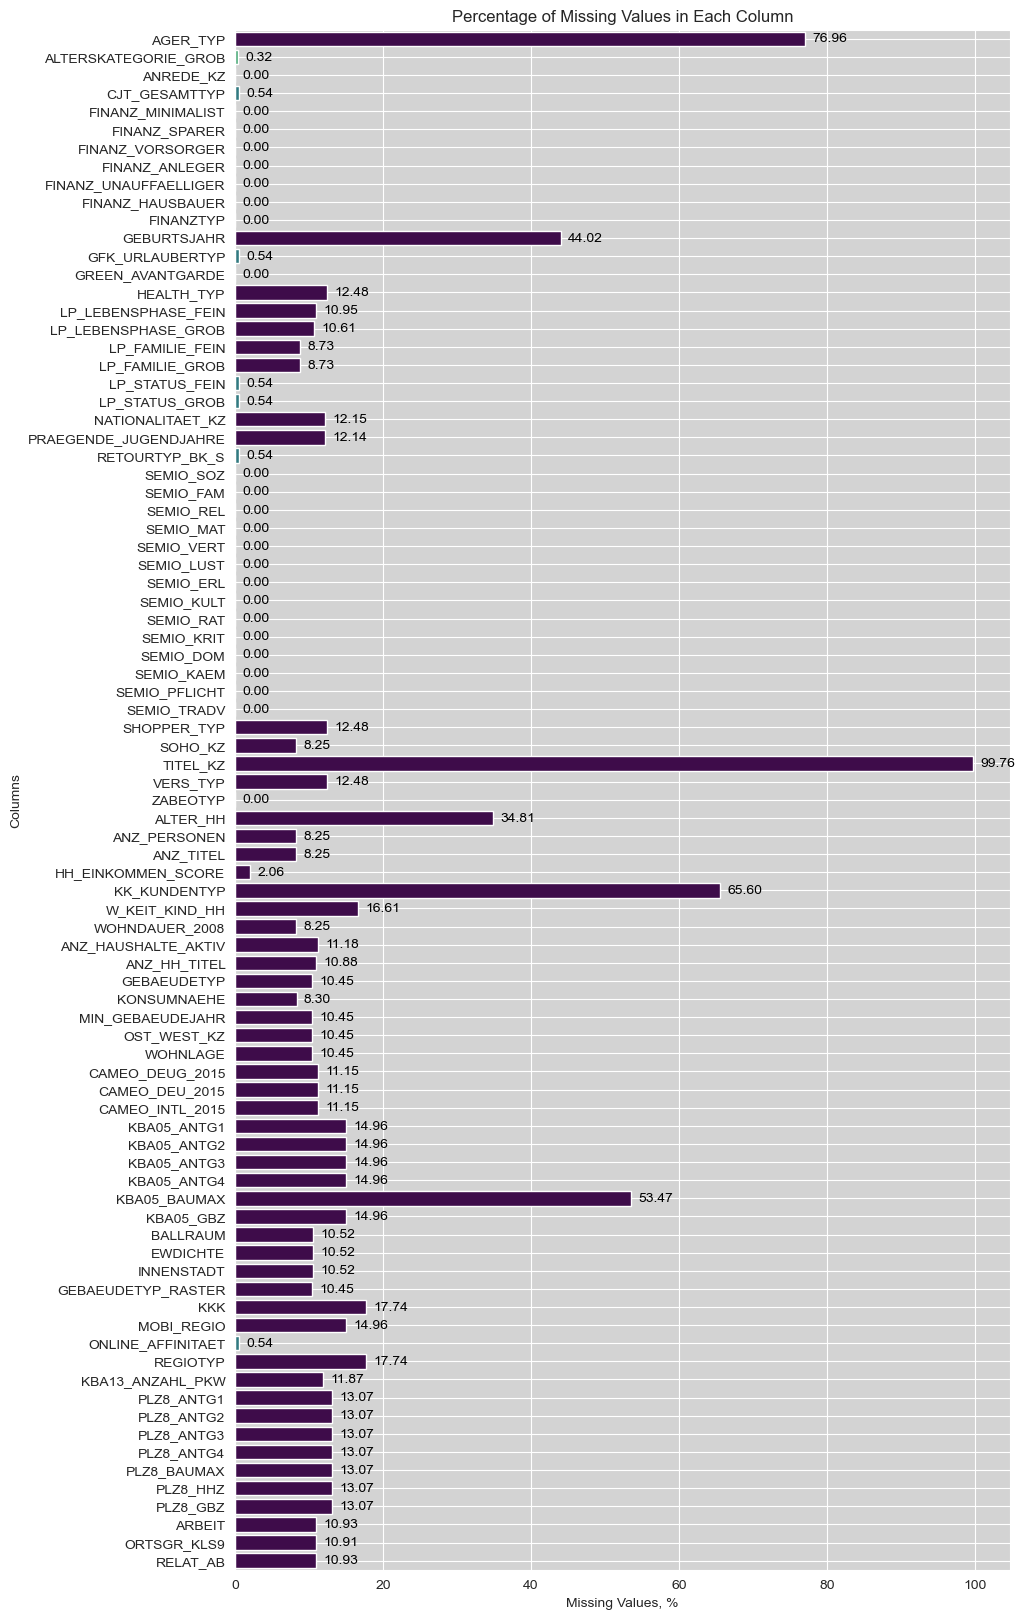

"Outliar columns:['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']"

In [16]:
# Investigate patterns in the amount of missing data in each column.
outlier_columns = []  
def missing_perc_plot(df):
    global outlier_columns
    rows_num = df.shape[0]
    na_values = (df.isna().sum() / rows_num) * 100
    #saving outlier in a list to avoid any mistakes with column names later while dropping
    q3= na_values.quantile(0.75)
    q1 = na_values.quantile(0.25)
    threshold = q3+1.5*(q3-q1)
    for column, percentage in na_values.items():
        if percentage > threshold:
            outlier_columns.append(column)
    
    sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})
    plt.figure(figsize=(10, 20))
    ax = sns.barplot(x=na_values.values, 
                     y=na_values.index,
                     palette=sns.color_palette("viridis_r", 
                     n_colors=len(na_values), as_cmap=True)(na_values.values))

    plt.title("Percentage of Missing Values in Each Column")
    plt.xlabel("Missing Values, %")
    plt.ylabel("Columns")
    plt.xticks(rotation=0)
    plt.grid(True)

    # Add numbers near each bar
    for i, v in enumerate(na_values.values):
        ax.text(v + 1, i, f"{v:.2f}", color='black', va='center')
   

    plt.show()
    


missing_perc_plot(azdias)
f"Outliar columns:{outlier_columns}"

In [17]:
# Remove the outlier columns from the dataset.
azdias.drop(outlier_columns, axis=1,inplace = True)

#### Discussion 1.1.2: Assess Missing Data in Each Column

Several columns exhibit a high percentage of missing values, exceeding 20%. This indicates a significant absence of data for these features, leading to their exclusion from the analysis. The columns dropped due to high missing values include `'AGER_TYP'`, `'GEBURTSJAHR'`, `'TITEL_KZ'`, `'ALTER_HH'`, `'KK_KUNDENTYP'`, and `'KBA05_BAUMAX'`.

Furthermore, patterns emerge among columns that are interconnected, with similar or equal percentages of missing values. For instance, the columns `'LP_LEBENSPHASE_FEIN'` (life stage, fine scale) and `'LP_LEBENSPHASE_GROB'` (life stage, rough scale) share a comparable proportion of missing values. Similarly, `'LP_FAMILIE_FEIN'` (family type, fine scale) and `'LP_FAMILIE_GROB'` (family type, rough scale) exhibit a similar percentage of missing values.

Other interconnected columns with corresponding missing value patterns include `'ANZ_PERSONEN'` (number of adults in household) and `'ANZ_TITEL'` (number of professional academic title holders in household), as well as `'MIN_GEBAEUDEJAHR'` (first year building was mentioned in the database), `'OST_WEST_KZ'` (building location via former East/West Germany), and `'WOHNLAGE'` (neighborhood quality or rural flag).

Similar patterns are observed in the columns `'CAMEO_DEUG_2015'` (German CAMEO: Wealth/Life Stage Typology, rough scale), `'CAMEO_DEU_2015'` (German CAMEO: Wealth/Life Stage Typology, detailed scale), and `'CAMEO_INTL_2015'` (German CAMEO: Wealth/Life Stage Typology, mapped to international code).

Moreover, a group of columns related to the RR3 micro-cell and PLZ8 macro-cell, such as `'KBA05_ANTG1'`, `'KBA05_ANTG2'`, `'KBA05_ANTG3'`, `'KBA05_ANTG4'`, `'KBA05_GBZ'`, `'KBA13_ANZAHL_PKW'`, `'PLZ8_ANTG1'`, `'PLZ8_ANTG2'`, `'PLZ8_ANTG3'`, `'PLZ8_ANTG4'`, `'PLZ8_BAUMAX'`, `'PLZ8_HHZ'`, and `'PLZ8_GBZ'`, exhibit similar patterns of missing values within each respective group.

Additionally, columns related to community characteristics, including `'ARBEIT'` (share of unemployment in the community), `'ORTSGR_KLS9'` (size of community), and `'RELAT_AB'` (share of unemployment relative to county), display comparable percentages of missing values.

Patterns in missing values suggest a potential interdependency among the interconnected columns. Recognizing these patterns can assist in making informed decisions on how to handle missing data effectively.

#### Step 1.1.3: Assess Missing Data in Each Row



In [18]:
# How much data is missing in each row of the dataset?
#Create a separate column with the number of missing values per row
azdias['missing_num_per_row'] = azdias.apply(lambda row: row.isnull().sum(), axis=1)

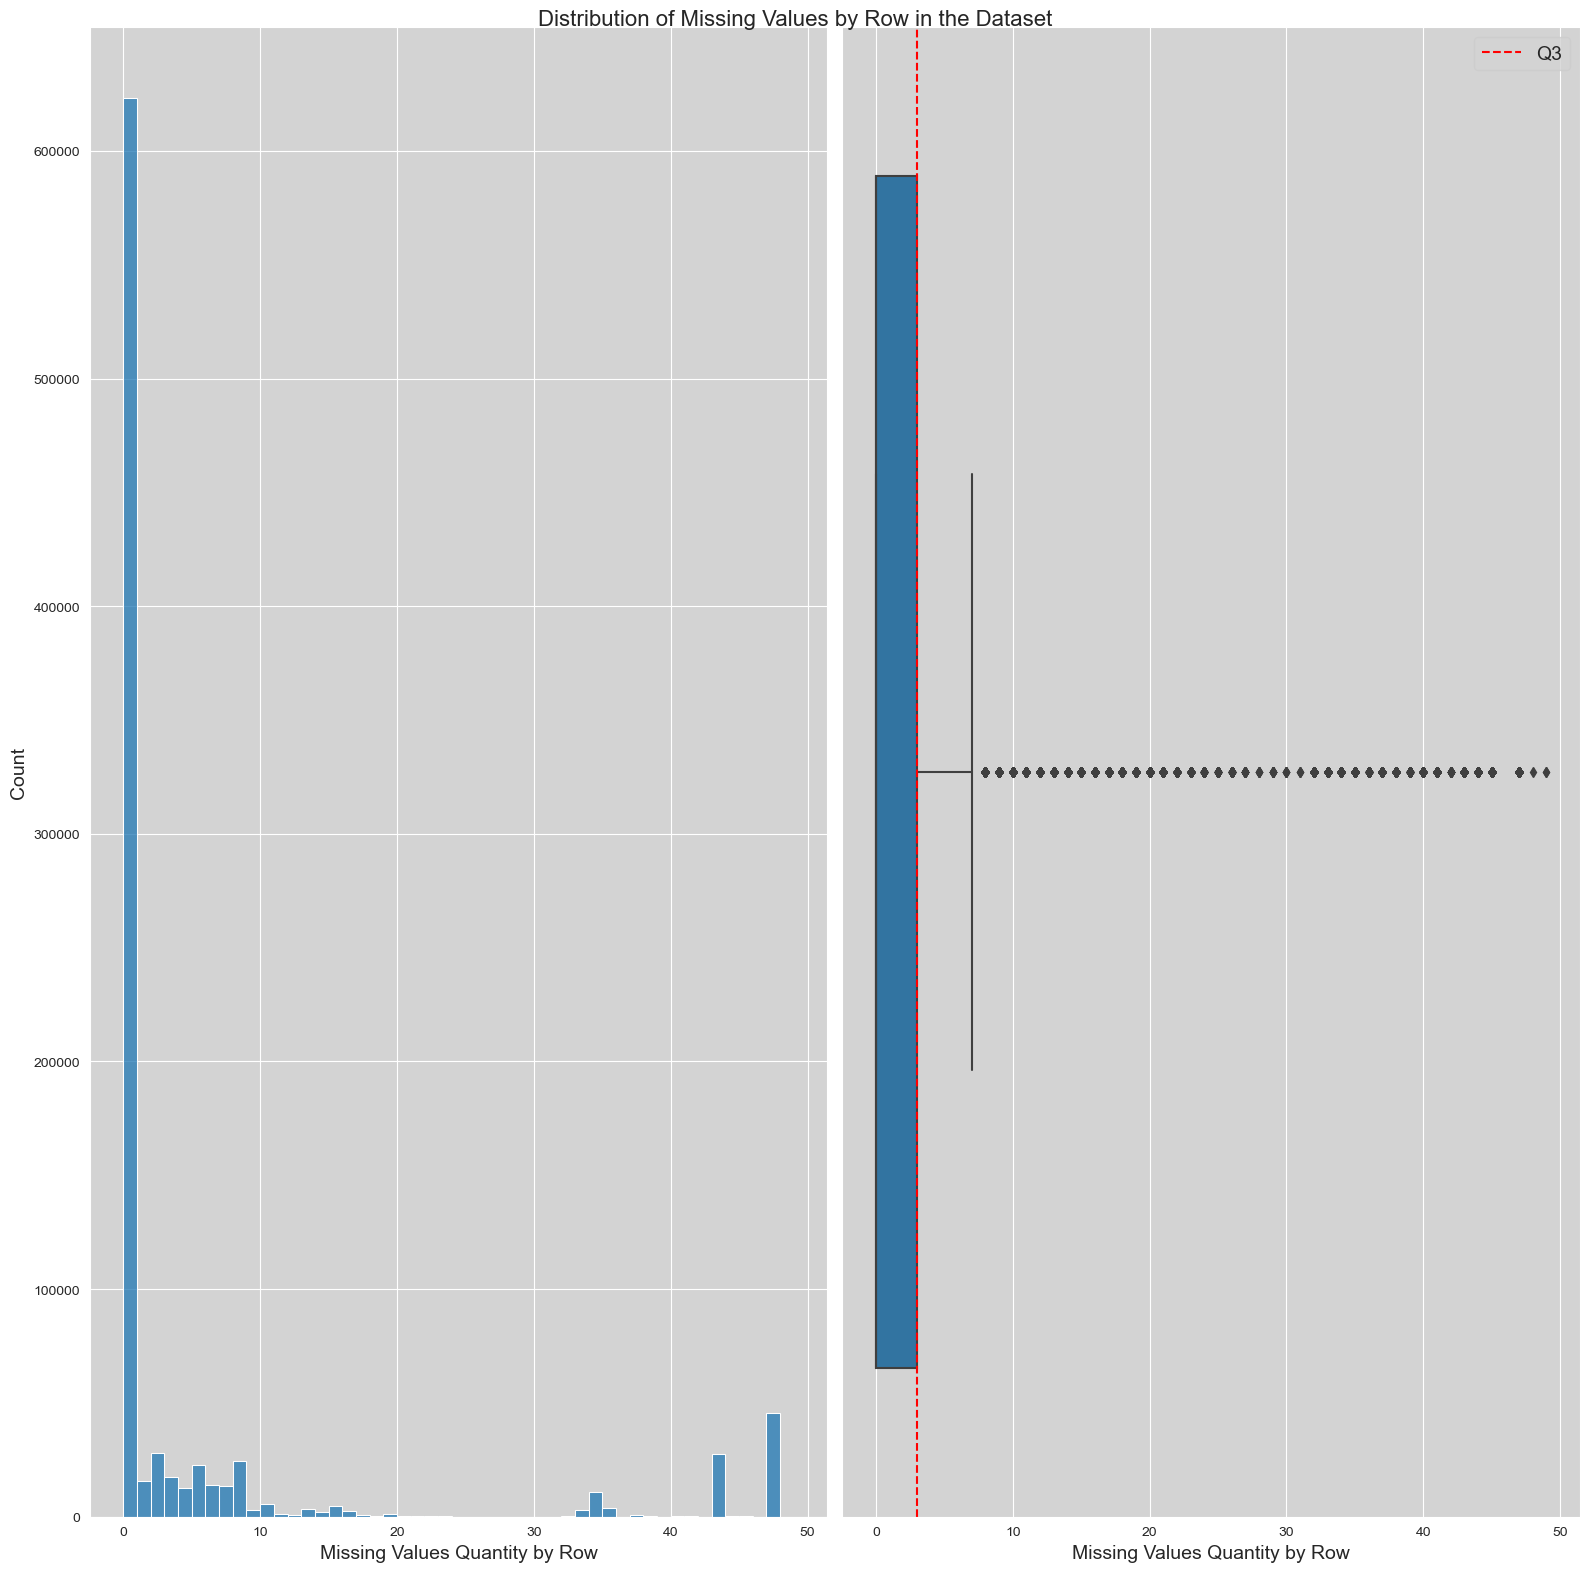

In [19]:
#Create a histogram and a boxplot representing new column values distribution and 
#determine a threshold for the dataset for later manipulations

sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})
fig, axes = plt.subplots(1, 2, figsize=(16, 16))

# Plot the histogram
ax1 = sns.histplot(data=azdias, x="missing_num_per_row",binwidth=1,ax=axes[0])
ax1.set_xlabel("Missing Values Quantity by Row", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)

# Plot the boxplot
ax2 = sns.boxplot(x=azdias["missing_num_per_row"], ax=axes[1])
ax2.set_xlabel("Missing Values Quantity by Row", fontsize=14)
ax2.set_ylabel("")

#Q3 line it will be our threshold
q3_value = azdias["missing_num_per_row"].quantile(0.75)
ax2.axvline(q3_value, color='r', linestyle='--', label="Q3")

#legend for the Q3 line
legend_line = plt.Line2D([], [], color='r', linestyle='--', label="Q3")
ax2.legend(handles=[legend_line], loc='upper right', fontsize=14)
#master title
fig.suptitle("Distribution of Missing Values by Row in the Dataset", fontsize=16)
plt.tight_layout()  
plt.show()

threshold = azdias["missing_num_per_row"].quantile(0.75) 

In [20]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

df1 = azdias[azdias['missing_num_per_row'] < threshold]
df2 = azdias[azdias['missing_num_per_row'] >= threshold]

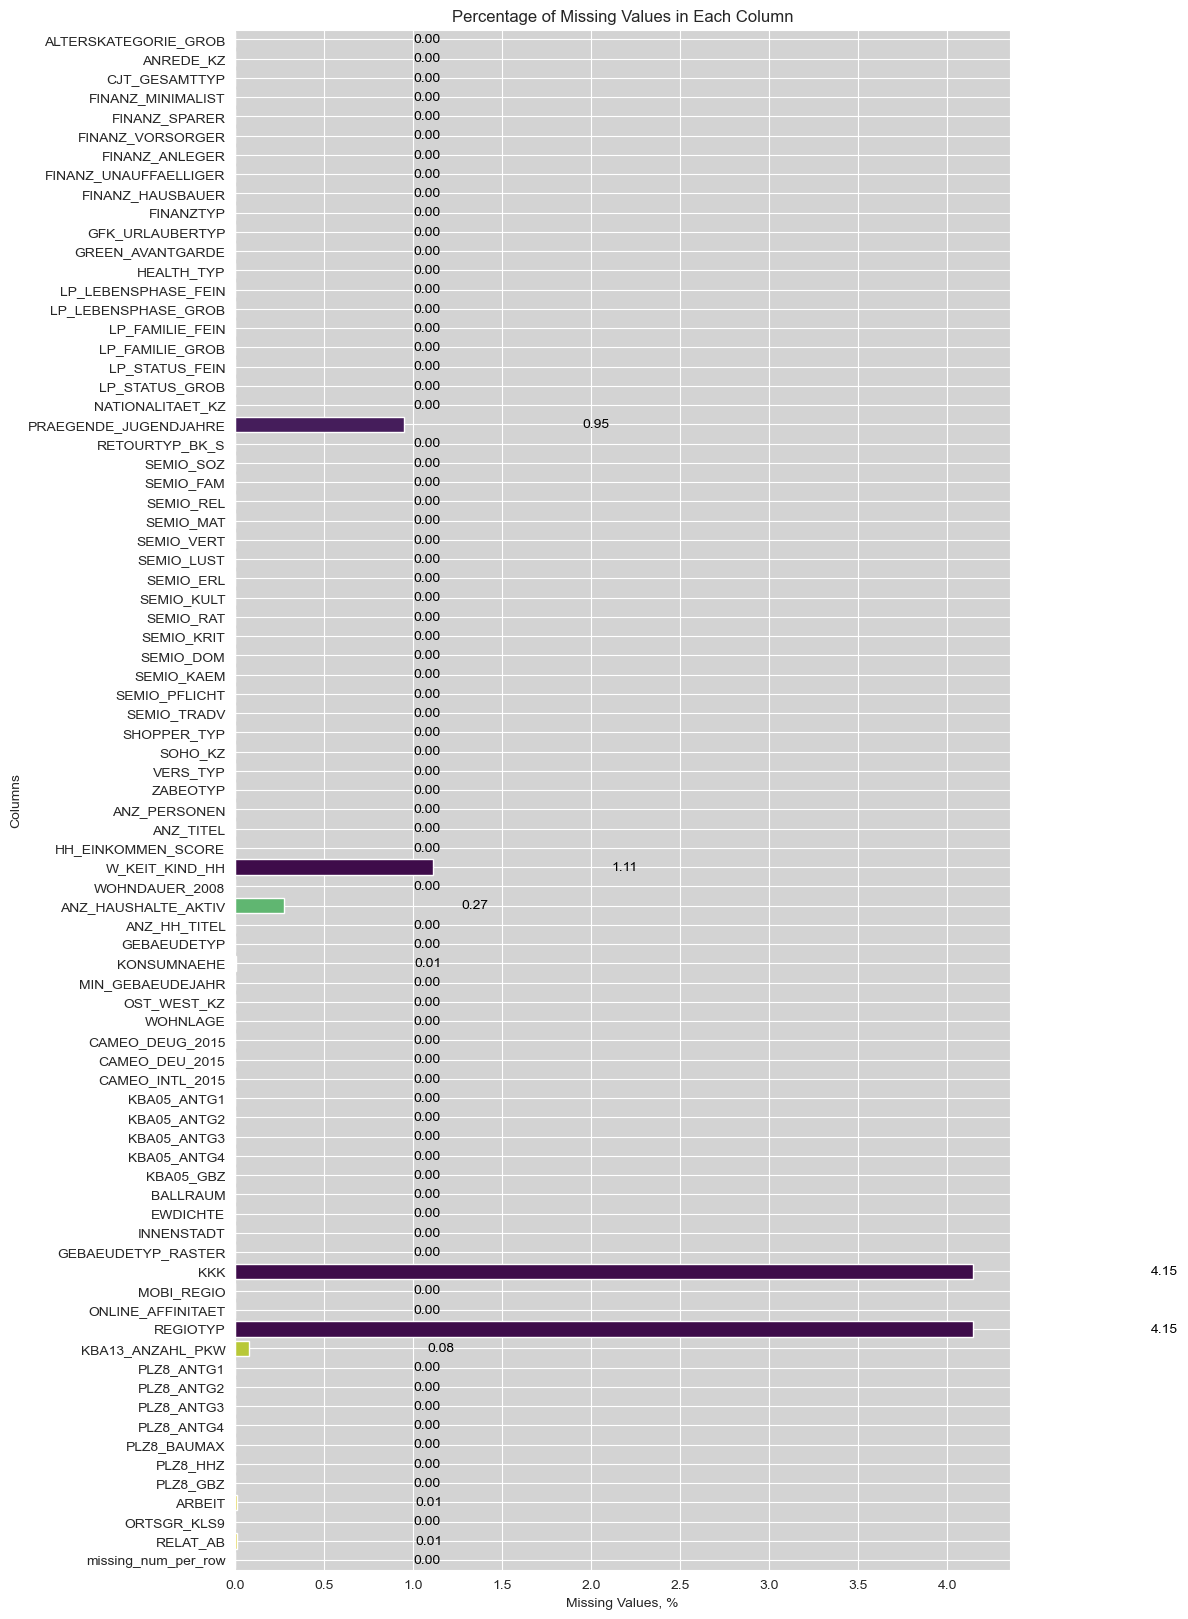

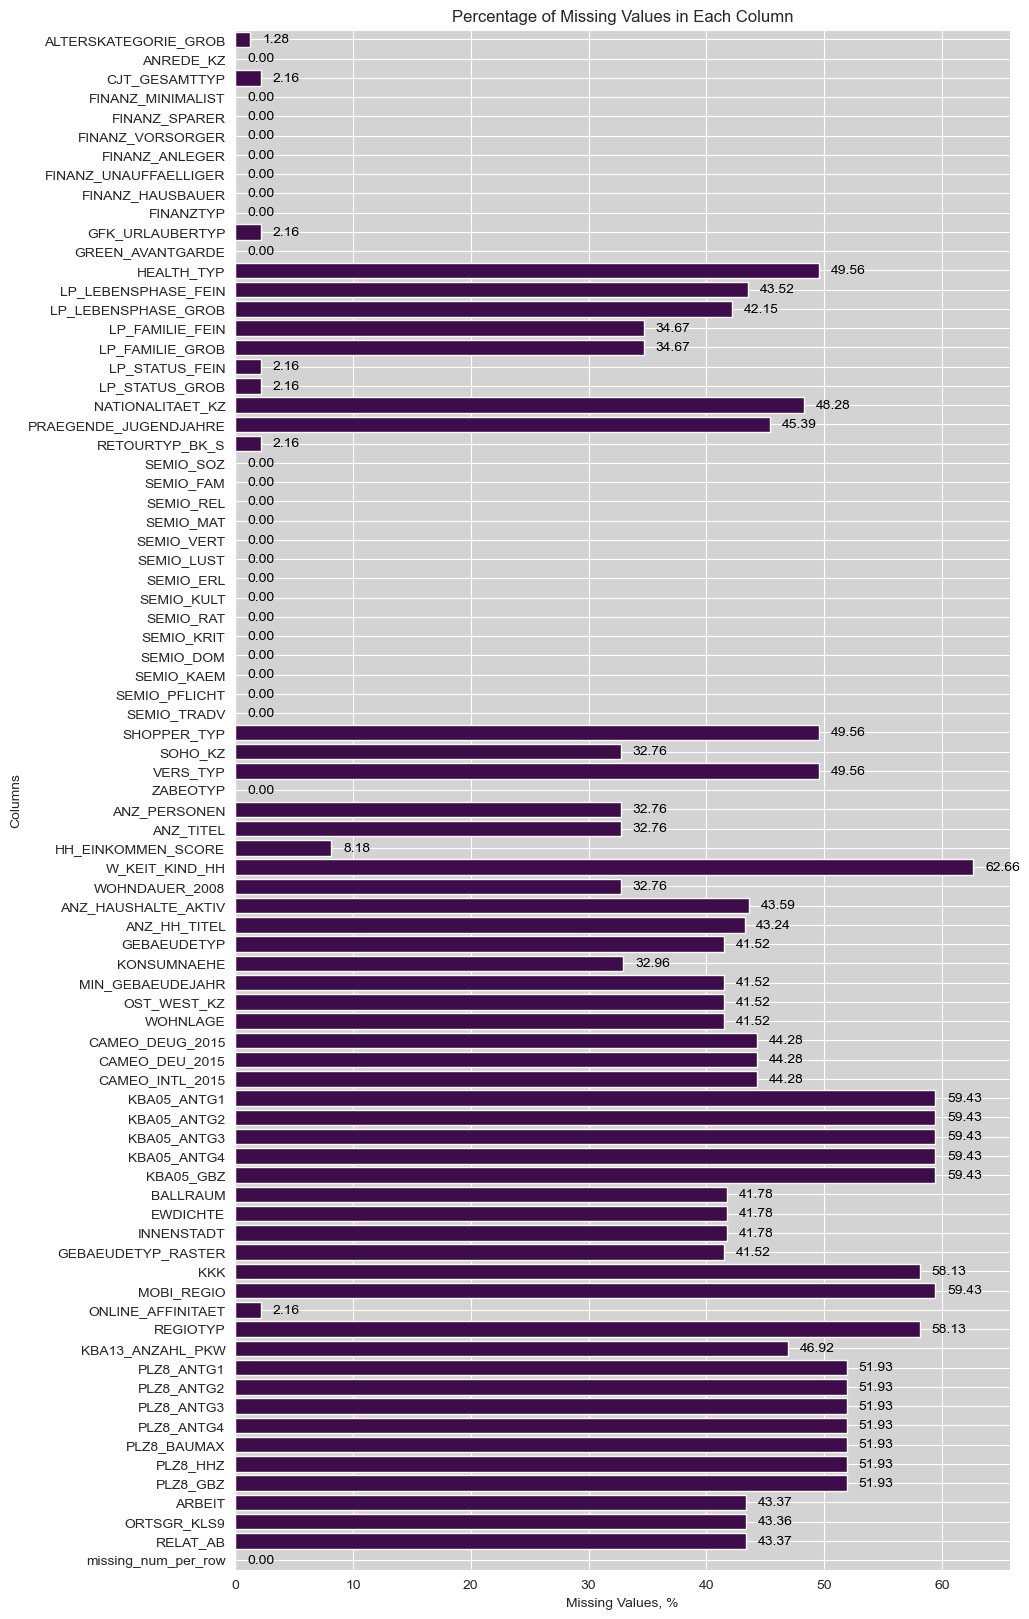

In [21]:
#checking the distribution of missing values within 2 new datasets: 
#below the threshold and above the threshold
missing_perc_plot(df1)
missing_perc_plot(df2)

In [22]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

#create a function for plotting

def financial_typology_comp(column, title):
    sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    
    #df1
    ax1 = sns.countplot(y=df1[column], ax=axes[0])
    ax1.set_ylabel("")
    ax1.set_xlabel("Count, Subset 1", fontsize=10)

    # df2
    ax2 = sns.countplot(y=df2[column], ax=axes[1])
    ax2.set_ylabel("")
    ax2.set_xlabel("Count, Subset 2", fontsize=10)
    
    #master title
    fig.suptitle( f"{title} financial typology column values distribution", fontsize=16)
    
    ax1.set_yticks(range(0, 5))
    ax1.set_yticklabels(['very high', 'high', 'average', 'low','very low'], rotation=0)
    ax2.set_yticks(range(0, 5))
    ax2.set_yticklabels(['very high', 'high', 'average', 'low','very low'], rotation=0)
    plt.show()

In [23]:
#creating a dictionary 'column':'column_description'

financial_typ_dict = {'FINANZ_MINIMALIST': 'Low financial interest','FINANZ_SPARER': 'Money-saver',
                      'FINANZ_VORSORGER': 'Be prepared', 'FINANZ_ANLEGER': 'Investor',
                      'FINANZ_UNAUFFAELLIGER': 'Inconspicuous','FINANZ_HAUSBAUER': 'Home ownership'}


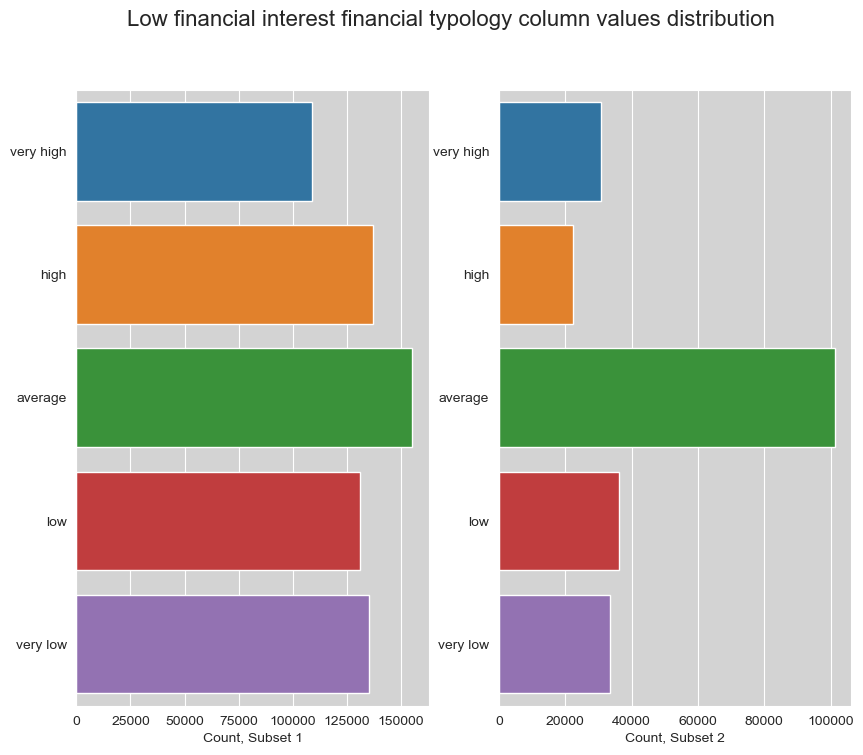

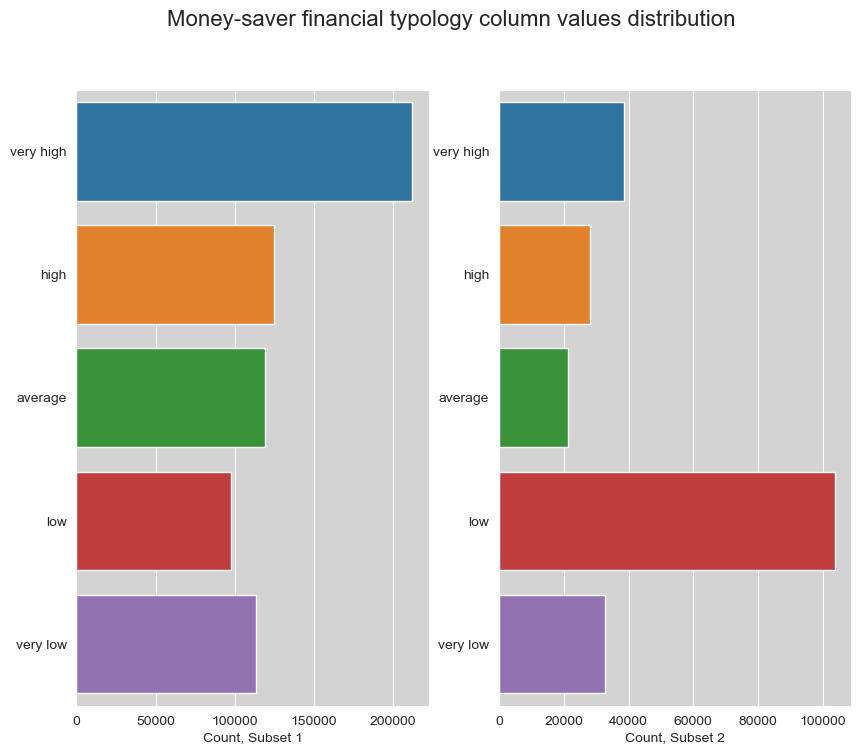

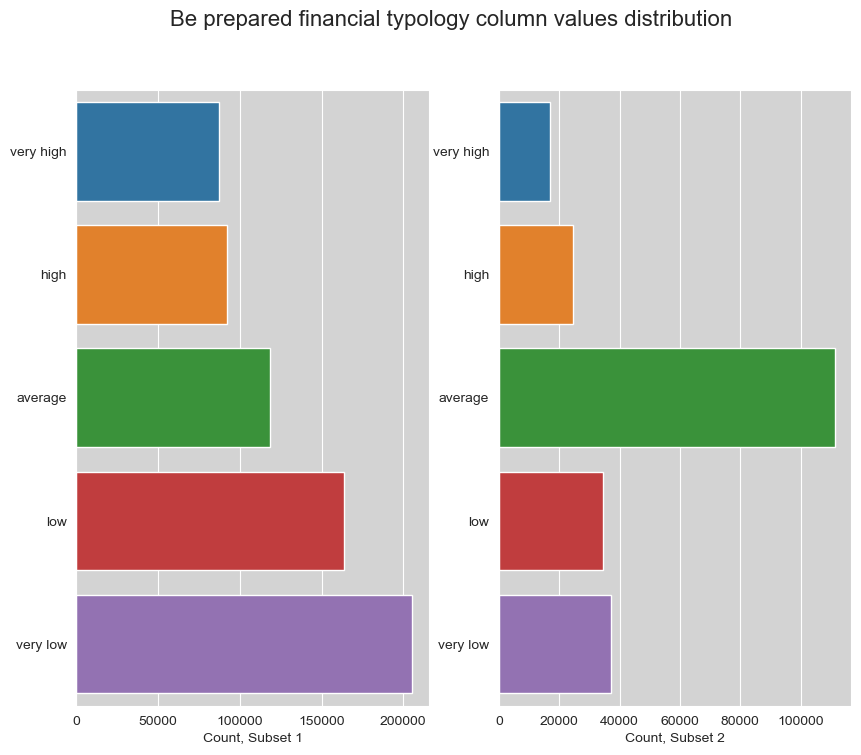

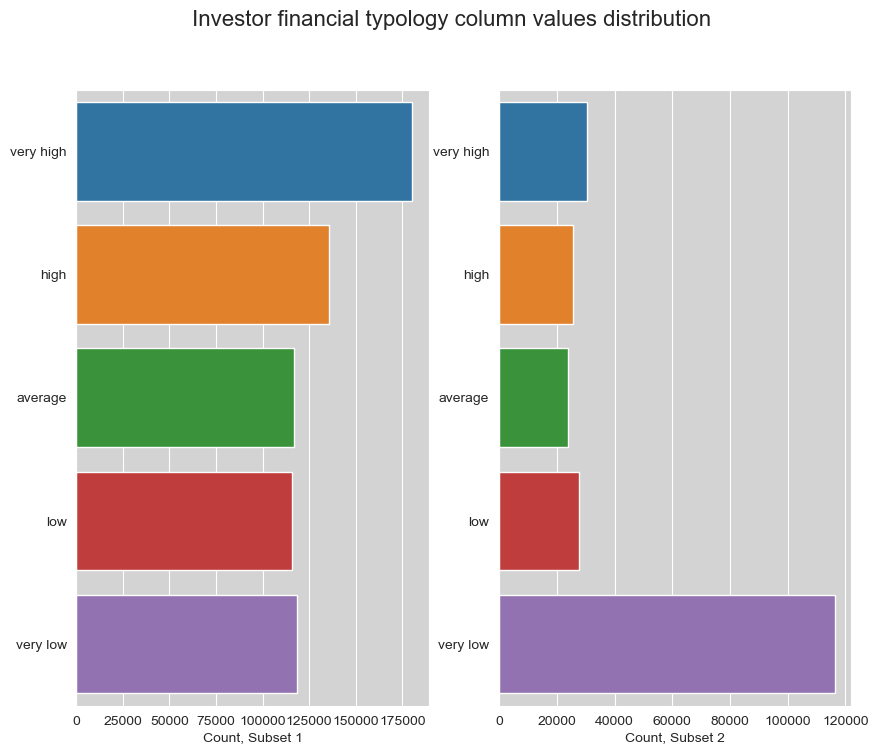

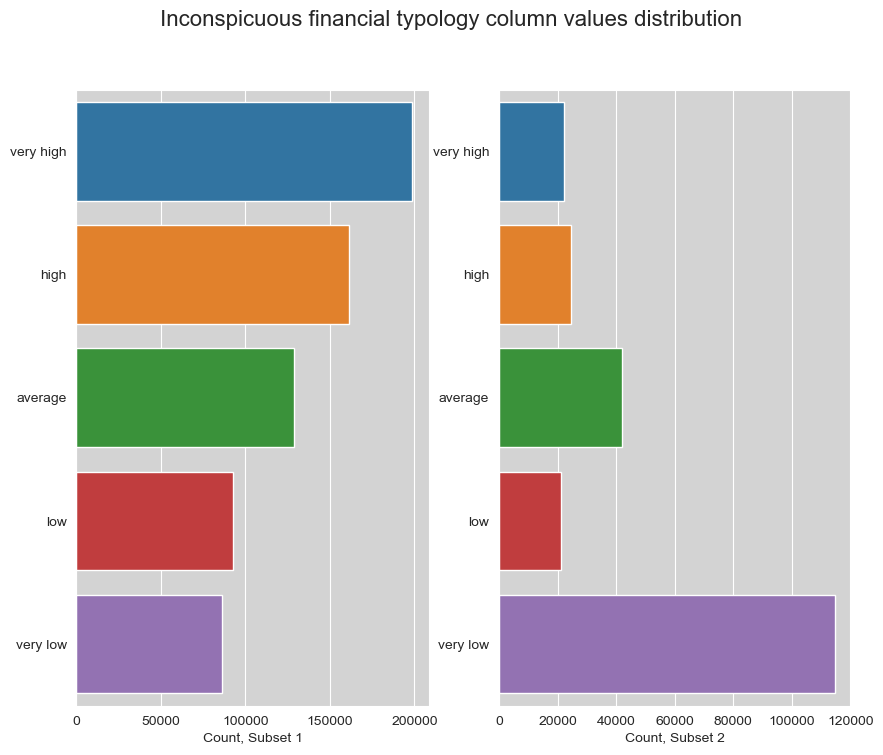

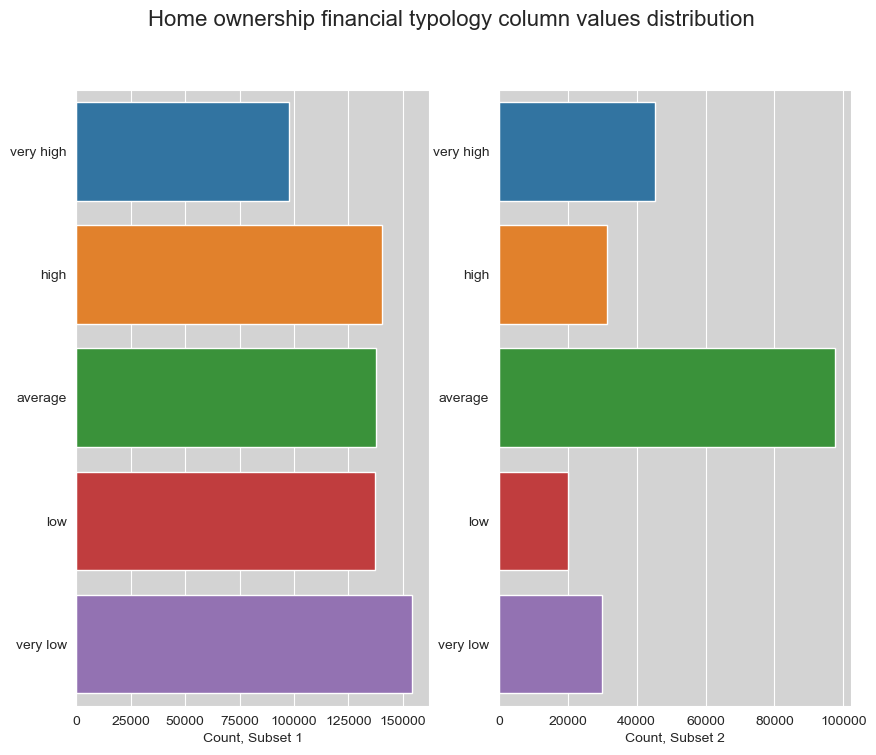

In [24]:
#applying a function
for key, value in financial_typ_dict.items():
    
    financial_typology_comp(key, value)
    

#### Discussion 1.1.3: Assess Missing Data in Each Row

Assessing missing data in each row provides valuable insights into the dataset's overall data quality and patterns of missing values. By dividing the data into subsets based on missing values, comparing and analyzing the differences between rows with low and high missing values is possible. This analysis highlights the need for careful consideration and appropriate handling of missing data to ensure the reliability and validity of subsequent analyses and interpretations.

A new column, "missing_num_per_row," was created to quantify the missing data in each row. This column counts the number of missing values in each row by applying a lambda function to calculate the sum of missing values for each row.

A histogram and a boxplot were created to visualize the distribution of values in the "missing_num_per_row" column. These visualizations provide insights into the dataset's overall pattern of missing values. Based on the boxplot, a threshold was determined for later data manipulation. In this case, the threshold was set at the 75th percentile, resulting in a value 4.

Later, The dataset was divided into two subsets based on the number of missing values in each row. Rows with missing values below the threshold were assigned to the subset "df1," while rows with missing values equal to or above the threshold were assigned to the subset "df2." This division compares rows with relatively low missing values and rows with a higher percentage of missing values.

The distribution of missing values was examined within the two subsets. In the first dataset (df1), the maximum percentage of missing values was found to be 4.15%, and very few columns have missing values. This indicates that relatively little data is missing in this subset. However, in the second dataset (df2), the maximum percentage of missing values exceeded 64%, and nearly all columns exhibited some degree of missing values.

To understand the differences between the subsets with low and high missing values, a comparison of the distribution of values was conducted for six columns with no or few missing values. This helps to identify potential patterns or discrepancies between the two subsets.
The data with many missing values in df2 differ significantly from those with few or no missing values in df1. The high percentage of missing values in df2 may indicate potential data quality issues or limited availability of certain attributes. Further investigation and consideration are required when analyzing or drawing conclusions from the subset with high missing values.

<a id='step1.2'></a>
### Step 1.2: Select and Re-Encode Features



In [25]:
# How many features are there of each data type?

feat_info['type'].value_counts()

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features



In [26]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

feat_info[feat_info['type'] == 'categorical']

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]


In [27]:
# Re-encode categorical variable(s) to be kept in the analysis.
# East (GDR) 0, West (FRG) 1
df1['OST_WEST_KZ'] = df1['OST_WEST_KZ'].map({'O': 0, 'W': 1})


C:\Users\naste\AppData\Local\Temp\ipykernel_13796\4136591797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OST_WEST_KZ'] = df1['OST_WEST_KZ'].map({'O': 0, 'W': 1})


#### Discussion 1.2.1: Re-Encode Categorical Features

Re-encoding categorical features is essential for numerical analysis and modeling. Re-encoding non-numeric values as numbers for binary variables provides a consistent and meaningful representation. Additionally, in cases where multi-level categorical features contain redundant information already captured in other columns, dropping the category helps streamline the dataset and avoid redundancy. By appropriately re-encoding categorical features, the dataset is prepared for further investigation and different machine-learning tasks.

In the case of a binary variable that takes on non-numeric values, such as "OST_WEST_KZ" with values "O" (East - GDR) and "W" (West - FRG), re-encoding was performed to represent these values as numbers. The re-encoding involved mapping "O" to 0 and "W" to 1 using the map() function.

Multi-level categorical columns were dropped from the dataset since the information contained within the category was already present in other columns. This decision helps reduce redundancy and streamline the analysis.

Columns for dropping:
- `'CJT_GESAMTTYP'` multi,numeric values 
- `'FINANZTYP'` multi,numeric values
- `'GFK_URLAUBERTYP'` multi,numeric values
- `'LP_FAMILIE_FEIN'`  multi,numeric values
- `'LP_FAMILIE_GROB'` multi,numeric values
- `'LP_STATUS_FEIN'` multi,numeric values
- `'LP_STATUS_GROB'` multi,numeric values
- `'NATIONALITAET_KZ'` multi,numeric values
- `'SHOPPER_TYP'`  multi,numeric values
- `'ZABEOTYP'` multi,numeric values
- `'GEBAEUDETYP'` multi,numeric values
- `'CAMEO_DEUG_2015'` multi,numeric values
- `'CAMEO_DEU_2015'` multi, non-numeric values

Columns left:
- `'ANREDE_KZ'` bi, numeric values
- `'GREEN_AVANTGARDE'` bi, numeric values
- `'SOHO_KZ'` bi, numeric values
- `'VERS_TYP'` bi, numeric values
- `'OST_WEST_KZ'` bi, non-numeric values


#### Step 1.2.2: Engineer Mixed-Type Features


In [28]:
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


In [29]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

#dict format : key:[decade_code,Mainstream(0) vs Avantgarde(1),]

PRAEGENDE_JUGENDJAHRE_dict = {1:[1,0],
                             2:[1,1],
                             3:[2,0],
                             4:[2,1],
                             5:[3,0],
                             6:[3,1],
                             7:[3,1],
                             8:[4,0],
                             9:[4,1],
                             10:[5,0],
                             11:[5,1],
                             12:[5,0],
                             13:[5,1],
                             14:[6,0],
                             15:[6,1]}
# since its less that 1 percent of missing values in that column we can replace it with mode value
df1['PRAEGENDE_JUGENDJAHRE']=df1['PRAEGENDE_JUGENDJAHRE'].fillna(df1['PRAEGENDE_JUGENDJAHRE'].mode()[0])
df1['JUGENDJAHRE'] = df1['PRAEGENDE_JUGENDJAHRE'].map(lambda x: PRAEGENDE_JUGENDJAHRE_dict[x][0])
df1['BEWEGUNG'] = df1['PRAEGENDE_JUGENDJAHRE'].map(lambda x: PRAEGENDE_JUGENDJAHRE_dict[x][1])


C:\Users\naste\AppData\Local\Temp\ipykernel_13796\3624225666.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PRAEGENDE_JUGENDJAHRE']=df1['PRAEGENDE_JUGENDJAHRE'].fillna(df1['PRAEGENDE_JUGENDJAHRE'].mode()[0])
C:\Users\naste\AppData\Local\Temp\ipykernel_13796\3624225666.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['JUGENDJAHRE'] = df1['PRAEGENDE_JUGENDJAHRE'].map(lambda x: PRAEGENDE_JUGENDJAHRE_dict[x][0])
C:\Users\naste\AppData\Local\Temp\ipykernel_13796\3624225666.py:23: SettingWithCo

In [30]:
#check
print(df1['BEWEGUNG'].unique())
print(df1['JUGENDJAHRE'].unique())

[0 1]
[6 4 2 5 3 1]


In [31]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

df1['VERMOGEN'] = df1['CAMEO_INTL_2015']//10
df1['LEBENSPHASEN'] = df1['CAMEO_INTL_2015']%10


C:\Users\naste\AppData\Local\Temp\ipykernel_13796\2498092002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['VERMOGEN'] = df1['CAMEO_INTL_2015']//10
C:\Users\naste\AppData\Local\Temp\ipykernel_13796\2498092002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LEBENSPHASEN'] = df1['CAMEO_INTL_2015']%10


In [32]:
#check
print(df1['VERMOGEN'].unique())
print(df1['LEBENSPHASEN'].unique())

<IntegerArray>
[5, 2, 4, 1, 3]
Length: 5, dtype: Int64
<IntegerArray>
[1, 4, 3, 2, 5]
Length: 5, dtype: Int64


#### Discussion 1.2.2: Engineer Mixed-Type Features

Columns for dropping:
- `'LP_LEBENSPHASE_FEIN'`	redundant
- `'LP_LEBENSPHASE_GROB'` redundant
- `'PRAEGENDE_JUGENDJAHRE'` redundant
- `'WOHNLAGE'` redundant
- `'PLZ8_BAUMAX'` redundant

Columns left:
- `'CAMEO_INTL_2015'` - modified into 2 columns:`'VERMOGEN'` and `'LEBENSPHASEN'`
- `'PRAEGENDE_JUGENDJAHRE'` - modified into 2 columns: `'JUGENDJAHRE'` and `'BEWEGUNG'`
original columns should be dropped later

New columns descriptions:
#### `'JUGENDJAHRE'` 
- person's youth decade:
    - 1: 40s
    - 2: 50s
    - 3: 60s
    - 4: 70s
    - 5: 80s
    - 6: 90s

#### `'BEWEGUNG'`
- Dominating movement of person's youth (avantgarde vs. mainstream)
    - 0: Mainstream
    - 1: Avantgarde
    
#### `'VERMOGEN'`
- Wealth Typology
    - 1: Wealthy Households
    - 2: Prosperous Households
    - 3: Comfortable Households
    - 4: Less Affluent Households
    - 5: Poorer Households

#### `'LEBENSPHASEN'`
- Life Stage Typology
    - 1: Pre-Family Couples & Singles
    - 2: Young Couples With Children
    - 3: Families With School Age Children
    - 4: Older Families &  Mature Couples
    - 5: Elders In Retirement
---------------------    
- PRAEGENDE_JUGENDJAHRE variable: 
It combines information on generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). Since there aren't enough levels to distinguish east from west, I created two new variables to capture the other two dimensions:
    
    - JUGENDJAHRE: This variable represents the decade and is derived from the PRAEGENDE_JUGENDJAHRE column using a dictionary mapping. It assigns a corresponding decade code to each value.
    
    - BEWEGUNG: This binary variable captures the movement aspect and is derived from the PRAEGENDE_JUGENDJAHRE column using the same dictionary mapping. It assigns a value of 0 for mainstream and 1 for avantgarde.
    
- CAMEO_INTL_2015 variable: 
It combines information on wealth and life stage. I engineered two new variables based on this column:

    - VERMOGEN: This interval-type variable represents wealth and is obtained by dividing the CAMEO_INTL_2015 column by 10.

    - LEBENSPHASEN: This ordinal variable captures the life stage and is obtained by taking the modulus (remainder) of the CAMEO_INTL_2015 column divided by 10.

#### Step 1.2.3: Complete Feature Selection



In [33]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

df1.drop(['CAMEO_INTL_2015',"PRAEGENDE_JUGENDJAHRE",'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB',\
         'WOHNLAGE','PLZ8_BAUMAX','LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'CAMEO_DEUG_2015', \
          'LP_FAMILIE_FEIN','CAMEO_DEU_2015','CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', \
          'LP_STATUS_FEIN','NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP','missing_num_per_row'], axis=1,inplace = True)

C:\Users\naste\AppData\Local\Temp\ipykernel_13796\404963760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['CAMEO_INTL_2015',"PRAEGENDE_JUGENDJAHRE",'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB',\


In [34]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666873 entries, 1 to 891220
Data columns (total 65 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   ALTERSKATEGORIE_GROB   666873 non-null  Int64
 1   ANREDE_KZ              666873 non-null  Int64
 2   FINANZ_MINIMALIST      666873 non-null  Int64
 3   FINANZ_SPARER          666873 non-null  Int64
 4   FINANZ_VORSORGER       666873 non-null  Int64
 5   FINANZ_ANLEGER         666873 non-null  Int64
 6   FINANZ_UNAUFFAELLIGER  666873 non-null  Int64
 7   FINANZ_HAUSBAUER       666873 non-null  Int64
 8   GREEN_AVANTGARDE       666873 non-null  int64
 9   HEALTH_TYP             666873 non-null  Int64
 10  RETOURTYP_BK_S         666873 non-null  Int64
 11  SEMIO_SOZ              666873 non-null  Int64
 12  SEMIO_FAM              666873 non-null  Int64
 13  SEMIO_REL              666873 non-null  Int64
 14  SEMIO_MAT              666873 non-null  Int64
 15  SEMIO_VERT       

<a id='step1.3'></a>
### Step 1.3: Create a Cleaning Function



In [35]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    # step 1: convert missing value codes into NaNs,
    for key, values in missing_vals_dict.items():
        # Find rows where the column values match the dictionary values
        mask = df[key].isin(values)
        # Assign NaN to the matched cells
        df.loc[mask, key] = np.nan
    
    # step2: remove selected columns and rows, 
    # step 2.1: create na_values and outlier_columns empty list
    rows_num = df.shape[0]
    na_values = (df.isna().sum() / rows_num) * 100
    outlier_columns = []
    

    # step 2.2: determine a list of outlier columns
    
    for column, percentage in na_values.items():
        if percentage > 35:
            outlier_columns.append(column)
   
    # step 2.3: Remove the outlier columns from the dataset.
    df.drop(outlier_columns, axis=1,inplace = True)
    # step 2.4: fix data types
    if 'CAMEO_DEUG_2015' and 'CAMEO_INTL_2015' in df.columns:
        df[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']] = df[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']].astype('Int64')
    # Convert float64 columns to int
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].astype('Int64')
    
    
    #step 2.5: Create a separate column with the number of missing values per row
    df['missing_num_per_row'] = df.apply(lambda row: row.isnull().sum(), axis=1)
    #step 2.6: determine a threshold for number of missing values per row
    threshold = df["missing_num_per_row"].quantile(0.75) 
    # step 2.7: remove rows with exceeding amount of missing values in a row
    df = df[df['missing_num_per_row'] < threshold]
    
    # step 3: select, re-encode, and engineer column values.
    # step 3.1: re-encode the values as numbers for binary variable that takes on non-numeric values
    
    if 'OST_WEST_KZ' in df.columns:
        df['OST_WEST_KZ'] = df['OST_WEST_KZ'].map({'O': 0, 'W': 1}) 
    #step 3.2: creating a dict for PRAEGENDE_JUGENDJAHRE column 
    PRAEGENDE_JUGENDJAHRE_dict = {1:[1,0],
                             2:[1,1],
                             3:[2,0],
                             4:[2,1],
                             5:[3,0],
                             6:[3,1],
                             7:[3,1],
                             8:[4,0],
                             9:[4,1],
                             10:[5,0],
                             11:[5,1],
                             12:[5,0],
                             13:[5,1],
                             14:[6,0],
                             15:[6,1]}
    #step 3.3: create 2 columns and assign values based on the dict
    if 'PRAEGENDE_JUGENDJAHRE' in df.columns:
        df['PRAEGENDE_JUGENDJAHRE']=df['PRAEGENDE_JUGENDJAHRE'].fillna(df['PRAEGENDE_JUGENDJAHRE'].mode()[0])
        df['JUGENDJAHRE'] = df['PRAEGENDE_JUGENDJAHRE'].map(lambda x: PRAEGENDE_JUGENDJAHRE_dict[x][0])
        df['BEWEGUNG'] = df['PRAEGENDE_JUGENDJAHRE'].map(lambda x: PRAEGENDE_JUGENDJAHRE_dict[x][1])
    # step 3.4: create 2 columns as assign wealth or life stage typology codes
    if 'CAMEO_INTL_2015' in df.columns:
        df['VERMOGEN'] = df['CAMEO_INTL_2015']//10
        df['LEBENSPHASEN'] = df['CAMEO_INTL_2015']%10
    #step3.5: drop unnessesary columns:
    df.drop(['CAMEO_INTL_2015',"PRAEGENDE_JUGENDJAHRE",'LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB',\
         'WOHNLAGE','PLZ8_BAUMAX','LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'CAMEO_DEUG_2015', \
          'LP_FAMILIE_FEIN','CAMEO_DEU_2015','CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', \
          'LP_STATUS_FEIN','NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP','missing_num_per_row'], axis=1,inplace = True)
    # step 5:make sure that all columns has correct data types
    df_clean = df.astype('Int64')
    # step 5: Return the cleaned dataframe.
    return df

<a id='step2'></a>
## Step 2: Feature Transformation

<a id='step2.1'></a>
### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. In this substep, we'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [36]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the data and transform the missing values
df1[df1.columns] = imputer.fit_transform(df1)
#check if everything is ok
df1.info()

C:\Users\naste\AppData\Local\Temp\ipykernel_13796\2560242203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1.columns] = imputer.fit_transform(df1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 666873 entries, 1 to 891220
Data columns (total 65 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ALTERSKATEGORIE_GROB   666873 non-null  float64
 1   ANREDE_KZ              666873 non-null  float64
 2   FINANZ_MINIMALIST      666873 non-null  float64
 3   FINANZ_SPARER          666873 non-null  float64
 4   FINANZ_VORSORGER       666873 non-null  float64
 5   FINANZ_ANLEGER         666873 non-null  float64
 6   FINANZ_UNAUFFAELLIGER  666873 non-null  float64
 7   FINANZ_HAUSBAUER       666873 non-null  float64
 8   GREEN_AVANTGARDE       666873 non-null  float64
 9   HEALTH_TYP             666873 non-null  float64
 10  RETOURTYP_BK_S         666873 non-null  float64
 11  SEMIO_SOZ              666873 non-null  float64
 12  SEMIO_FAM              666873 non-null  float64
 13  SEMIO_REL              666873 non-null  float64
 14  SEMIO_MAT              666873 non-nu

In [37]:
# since some missing values was encoded as non-numeric values, 
# the imputer converted the columns to a float data type
#fix data types:
df1 = df1.astype('Int64')

In [38]:
#check
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666873 entries, 1 to 891220
Data columns (total 65 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   ALTERSKATEGORIE_GROB   666873 non-null  Int64
 1   ANREDE_KZ              666873 non-null  Int64
 2   FINANZ_MINIMALIST      666873 non-null  Int64
 3   FINANZ_SPARER          666873 non-null  Int64
 4   FINANZ_VORSORGER       666873 non-null  Int64
 5   FINANZ_ANLEGER         666873 non-null  Int64
 6   FINANZ_UNAUFFAELLIGER  666873 non-null  Int64
 7   FINANZ_HAUSBAUER       666873 non-null  Int64
 8   GREEN_AVANTGARDE       666873 non-null  Int64
 9   HEALTH_TYP             666873 non-null  Int64
 10  RETOURTYP_BK_S         666873 non-null  Int64
 11  SEMIO_SOZ              666873 non-null  Int64
 12  SEMIO_FAM              666873 non-null  Int64
 13  SEMIO_REL              666873 non-null  Int64
 14  SEMIO_MAT              666873 non-null  Int64
 15  SEMIO_VERT       

In [39]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
df_s = scaler.fit_transform(df1)



### Discussion 2.1: Apply Feature Scaling

1. I replaced missing values in the columns with mode values since that is the most appropriate approach for the current values in the dataset(ordinary, interval, and categorical) and taking into account the low percentage of the missing values(4.15% max) and total quantity of columns with missing columns(9/65) using Imputer. It allows us to retain the information present in the dataset, maintain data distribution, and ensure consistency and interpretability.


2. There is no need to specify mean 0 and standard deviation 1 in the scaler since StandardScaler has default values with_mean=True and with_std=True.

<a id='step2.2'></a>
### Step 2.2: Perform Dimensionality Reduction



In [40]:
# Apply PCA to the data.

def do_pca(n_components, df):
    pca = PCA(n_components)
    df_pca = pca.fit_transform(df)
    return pca, df_pca

pca, df_pca = do_pca(65, df_s)

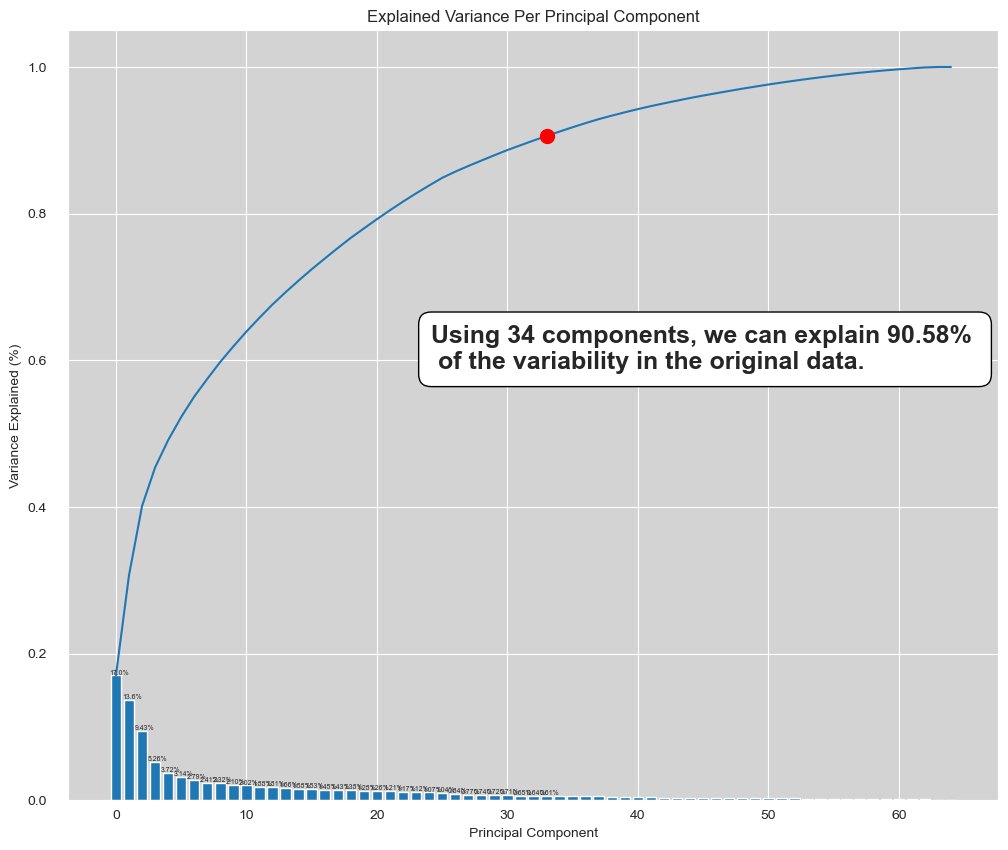

In [41]:
# Investigate the variance accounted for by each principal component.

def scree_plot(pca):
    
    
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    cumvals = np.cumsum(vals)
    cumvals_target = 90
    
    num_components = np.argmax(cumvals >= (cumvals_target/100)) + 1
    plt.figure(figsize=(12, 10))
    ax = plt.subplot(111)
    
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=5)

    # Add symbol at (num_components, cumulative_variance_target)
    ax.plot(num_components-1, cumvals[num_components-1], 'ro', markersize=10)
    
    # Add legend with symbol and text
    legend_title = f"Using {num_components} components, we can explain {cumvals[num_components-1]*100:.2f}% \n of the variability in the original data."
    legend_bbox = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    plt.text(0.39, 0.56, legend_title, transform=plt.gca().transAxes, fontsize='18', fontweight='bold', bbox=legend_bbox)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

    plt.show()
    
scree_plot(pca)

In [42]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca, df_pca = do_pca(34, df_s)

### Discussion 2.2: Perform Dimensionality Reduction

Based on our findings, I decided to retain 34 principal components for the clustering part of the project. These 34 components explain approximately 90.58% of the data variance, which suggests that they preserve a substantial portion of the original information. By reducing the dimensionality of the data to 34 features, we can effectively represent the dataset while reducing computational complexity and potential overfitting in the clustering algorithm.

Dimensionality reduction through PCA can significantly enhance the efficiency of subsequent analysis and clustering tasks, making it an essential step in the data preprocessing pipeline. With the retained 34 components, we can proceed with the clustering part of the project, confident that we have captured the most informative features while maintaining data integrity.

<a id='step2.3'></a>
### Step 2.3: Interpret Principal Components



In [43]:
#creating a dictionary of column weights in each dimension

dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_) + 1)]
components_dict = {}
for i, dimension in enumerate(dimensions):
    components_dict[dimension] = {}
    for j, column_label in enumerate(df1.columns):
        components_dict[dimension][column_label] = np.round(pca.components_[i, j], 4)

        
#sorting the dictionary        
sorted_components_dict = {}
for dimension, component_values in components_dict.items():
    sorted_components_dict[dimension] = dict(sorted(component_values.items(), key=lambda x: x[1], reverse=True))
#print(sorted_components_dict)

In [90]:
print(sorted_components_dict['Dimension 3'])

{'SEMIO_VERT': 0.3481, 'SEMIO_SOZ': 0.2632, 'SEMIO_FAM': 0.2509, 'SEMIO_KULT': 0.2317, 'FINANZ_MINIMALIST': 0.1578, 'RETOURTYP_BK_S': 0.1165, 'FINANZ_VORSORGER': 0.1, 'W_KEIT_KIND_HH': 0.0923, 'ALTERSKATEGORIE_GROB': 0.084, 'SEMIO_REL': 0.0782, 'SEMIO_LUST': 0.0748, 'SEMIO_MAT': 0.052, 'GREEN_AVANTGARDE': 0.05, 'BEWEGUNG': 0.05, 'EWDICHTE': 0.0468, 'ORTSGR_KLS9': 0.0465, 'PLZ8_ANTG4': 0.0444, 'PLZ8_ANTG3': 0.0438, 'WOHNDAUER_2008': 0.0354, 'ARBEIT': 0.0315, 'RELAT_AB': 0.0301, 'PLZ8_ANTG2': 0.0295, 'KBA05_ANTG4': 0.0276, 'ANZ_HAUSHALTE_AKTIV': 0.0256, 'VERMOGEN': 0.0242, 'VERS_TYP': 0.0193, 'ANZ_HH_TITEL': 0.0143, 'ANZ_TITEL': 0.0105, 'GEBAEUDETYP': 0.0069, 'KBA05_ANTG3': 0.0067, 'PLZ8_HHZ': 0.006, 'SOHO_KZ': 0.0003, 'ANZ_PERSONEN': -0.0063, 'REGIOTYP': -0.0079, 'LEBENSPHASEN': -0.0083, 'KBA05_ANTG2': -0.0108, 'OST_WEST_KZ': -0.0115, 'MIN_GEBAEUDEJAHR': -0.0137, 'HEALTH_TYP': -0.0139, 'KKK': -0.0176, 'KBA13_ANZAHL_PKW': -0.0209, 'KBA05_ANTG1': -0.0223, 'HH_EINKOMMEN_SCORE': -0.024, 'KB

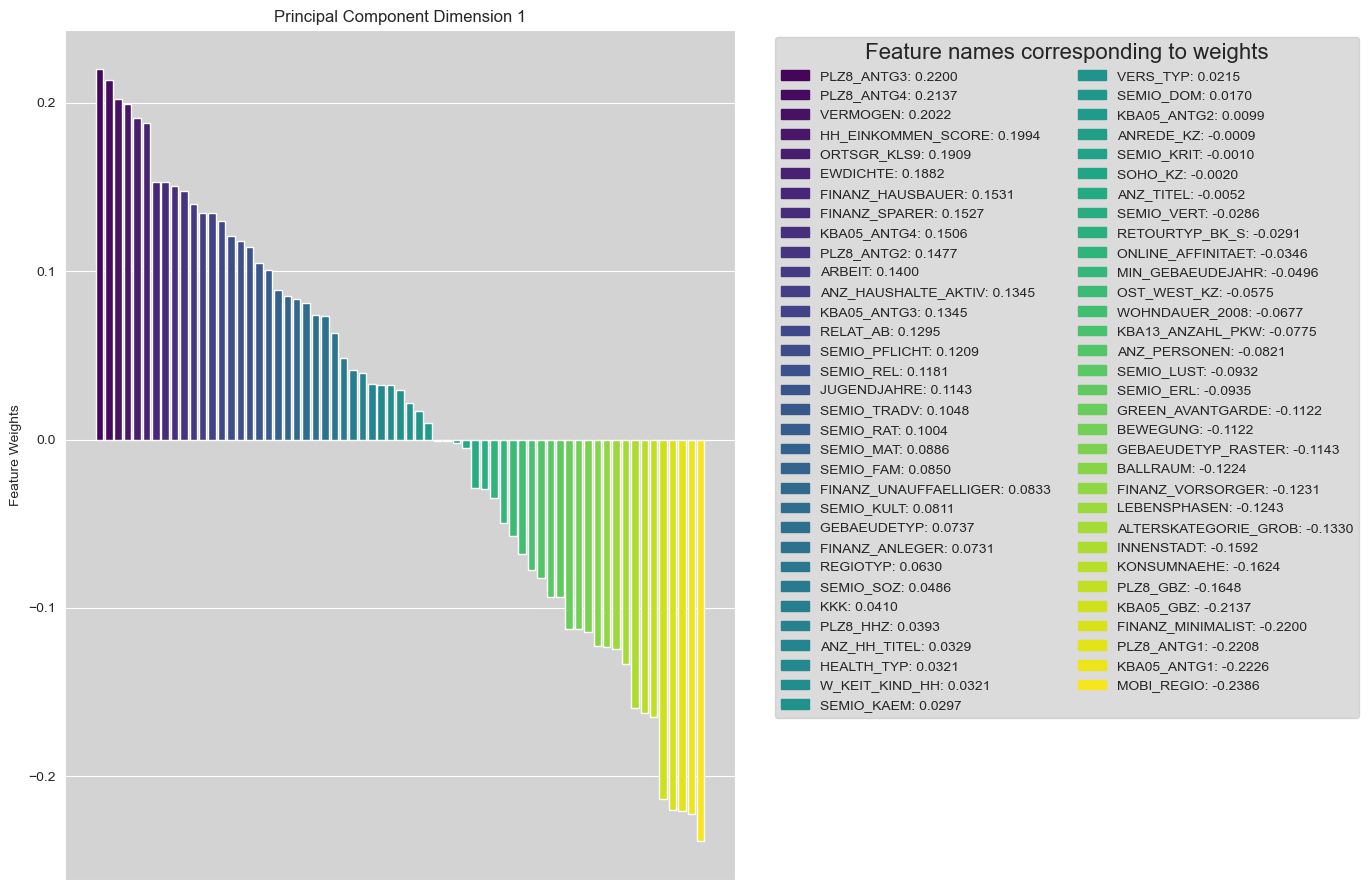

In [44]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.

import matplotlib.patches as mpatches
def plot_weights(data_dict, key_main):
    data = data_dict[key_main]

    fig, ax = plt.subplots(figsize=(14, 9))

    components_to_plot = list(data.values())
    features = list(data.keys())
    x_pos = np.arange(len(features))

    colors = sns.color_palette('viridis', len(features))
    ax.bar(x_pos, components_to_plot, align='center', color=colors)
    ax.set_xticks([])
    ax.set_ylabel("Feature Weights")
    ax.set_title(f"Principal Component {key_main}")

    # Create a legend for the colors
    handles = [mpatches.Patch(color=color, label=f"{feature}: {weight:.4f}")
               for color, feature, weight in zip(colors, features, components_to_plot)]
    num_cols = 2
    legend=ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=num_cols, title='Feature names corresponding to weights')
    plt.setp(legend.get_title(), fontsize='16')
    plt.tight_layout()
    plt.show()

plot_weights(sorted_components_dict, 'Dimension 1')

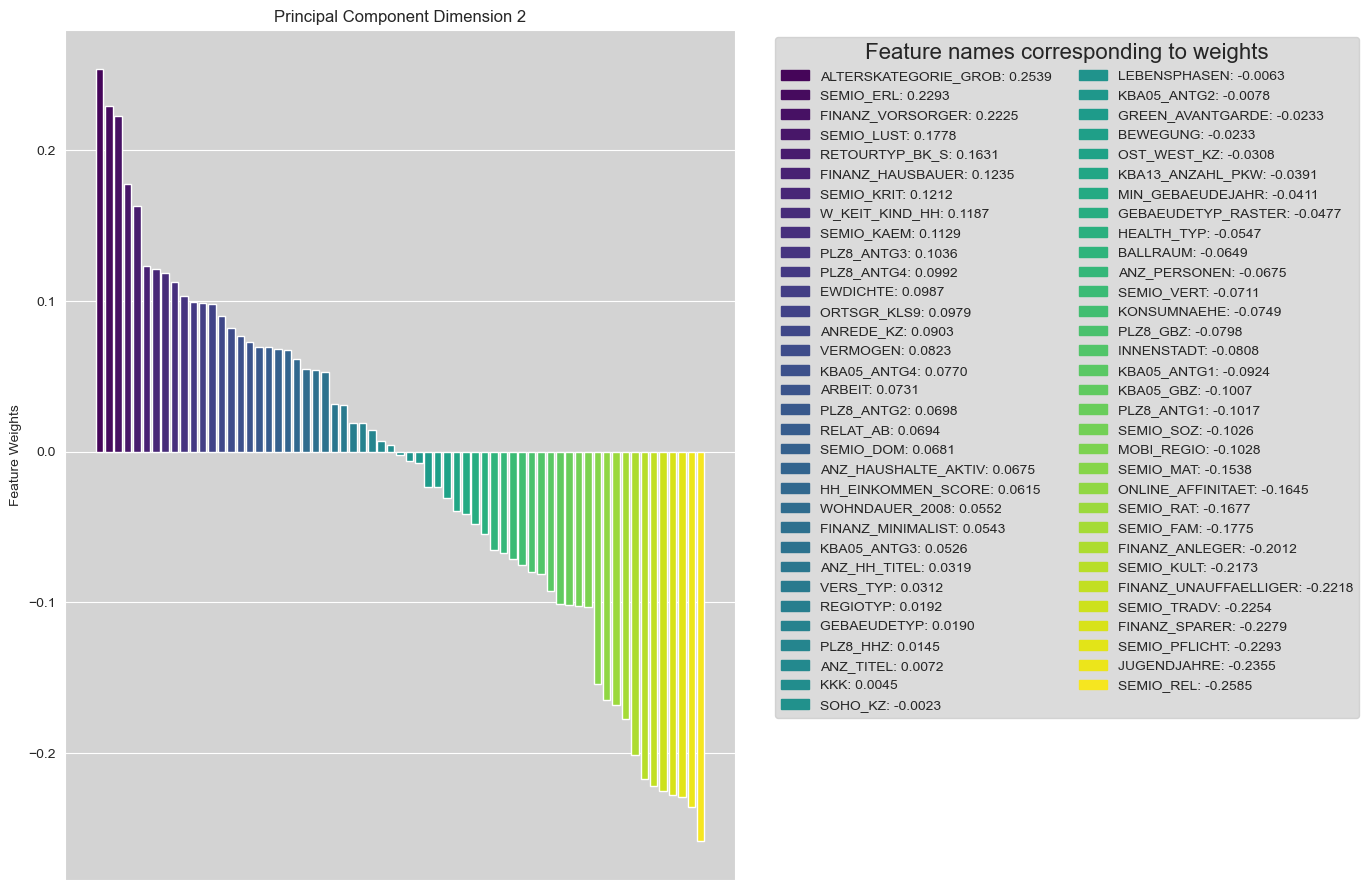

In [45]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

plot_weights(sorted_components_dict, 'Dimension 2')

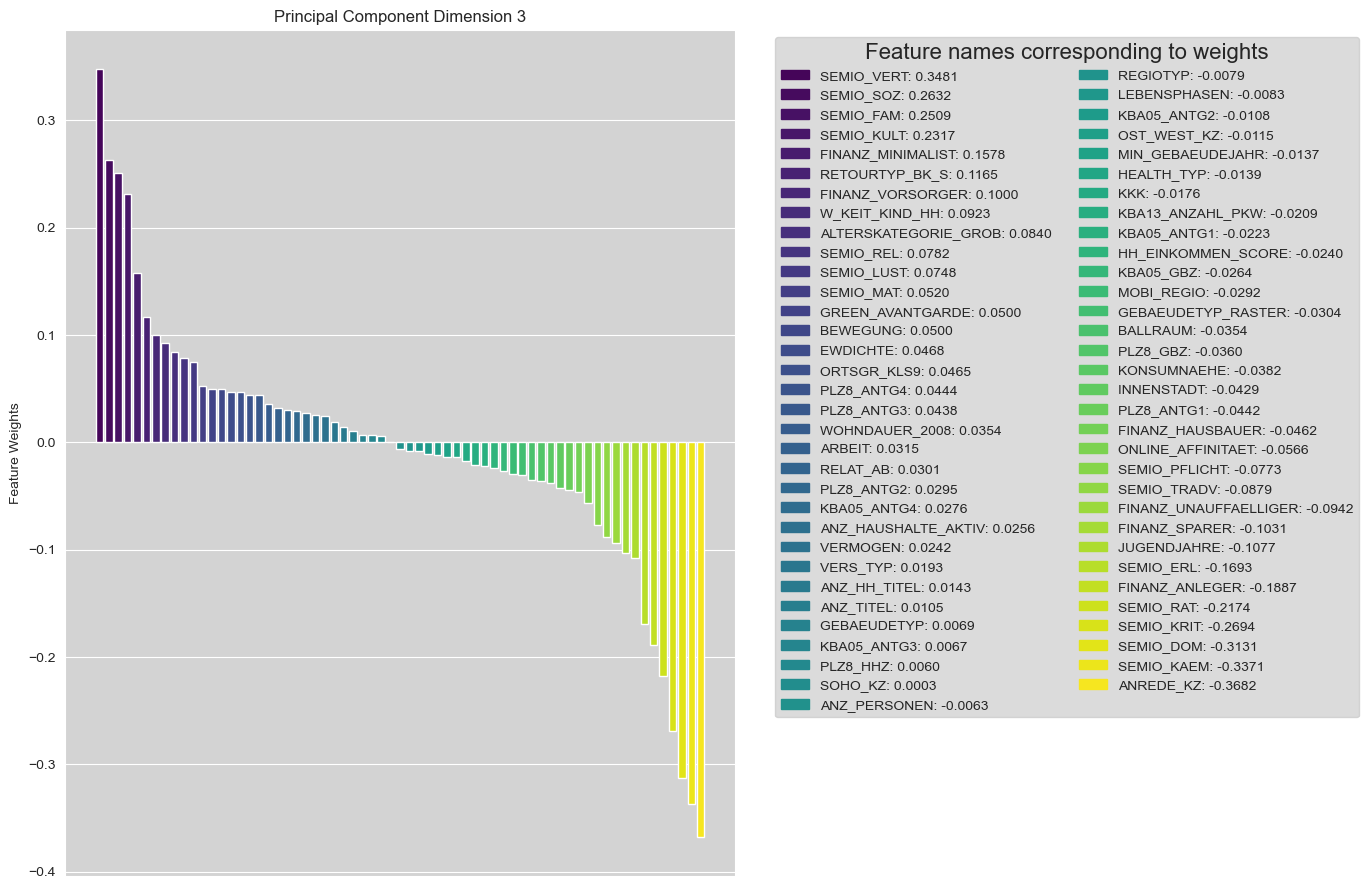

In [46]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

plot_weights(sorted_components_dict, 'Dimension 3')

### Discussion 2.3: Interpret Principal Components

#### Dimension 1

Features with higher positive weights strongly influence the first principal component, which explains the most variance in the data. These features contribute significantly to the major patterns and structures captured by the first principal component. As a result, they play a crucial role in distinguishing different segments or groups in the data.

- 'PLZ8_ANTG3' and 'PLZ8_ANTG4' are related to the number of 6-10 family houses and 10+ family houses, respectively, in the PLZ8 region. Their positive weights indicate that regions with a higher number of these family houses contribute positively to the first principal component's overall variance.
- 'VERMOGEN' represents the wealth typology and indicates that areas with wealthier households positively influence the first principal component.
- 'HH_EINKOMMEN_SCORE' refers to the estimated household net income and implies that regions with higher incomes positively affect the first principal component's variance.
- 'ORTSGR_KLS9' denotes the size of the community, and its positive weight suggests that larger communities contribute positively to the first principal component.
- 'EWDICHTE' represents households' density per square kilometer and indicates that regions with higher household density positively impact the first principal component's variability.

Features with negative weights have a negative influence on the first principal component. They contribute less to explaining the overall variance in the data, but they still play a role in capturing specific patterns or structures.

- 'KBA05_GBZ' is related to the number of buildings in the microcell, and its negative weight suggests that areas with fewer buildings in the microcell contribute negatively to the first principal component's variance.
- 'FINANZ_MINIMALIST' represents the financial typology of minimalists and implies that individuals with this financial behavior contribute negatively to the first principal component's variance.
- 'PLZ8_ANTG1' and 'KBA05_ANTG1' refer to the number of 1-2 family houses in the PLZ8 region and microcell, respectively. Their negative weights suggest that regions with fewer than 1-2 family houses contribute negatively to the first principal component.
- 'MOBI_REGIO' represents movement patterns and indicates that regions with lower mobility or movement contribute negatively to the first principal component's variability.

Overall, the feature weights provide valuable insights into which features are influential in the first principal component, capturing the most variance in the data. Positive weights indicate features that positively contribute to the overall variance, while negative weights suggest features that negatively impact the first principal component's variability. Understanding these feature weights can help understand the major drivers of variation in the data and identify important factors that distinguish different population segments.

#### Dimension 2

Features with higher positive weights have a strong positive influence on the second principal component. These features contribute significantly to the variation captured by the second principal component and play a crucial role in distinguishing different segments or patterns in the data.
- 'ALTERSKATEGORIE_GROB' represents the estimated age based on the given name analysis. Its positive weight suggests that certain age categories contribute positively to the second principal component's variance. This feature could help understand the distribution of different age groups within the segments.
- 'SEMIO_ERL' is related to the personality typology focusing on being rational-minded. Its positive weight indicates that individuals with a rational-minded personality contribute positively to the second principal component's variance.
- 'FINANZ_VORSORGER' represents the financial typology with a focus on individuals who are financially cautious and have a strong focus on preventive behavior. Its positive weight suggests that individuals with this financial behavior contribute positively to the second principal component's variability.
- 'SEMIO_LUST' is related to the personality typology focusing on being pleasure-oriented or having a lustful attitude. Its positive weight implies that individuals with a pleasure-oriented personality contribute positively to the second principal component's variance.
- 'RETOURTYP_BK_S' represents the return type, and its positive weight suggests that certain return types contribute positively to the second principal component's variance.

Features with negative weights have a negative influence on the second principal component. They contribute less to explaining the overall variance in the data for the second principal component, but they still play a role in capturing specific patterns or structures.
- 'FINANZ_UNAUFFAELLIGER' represents the financial typology of inconspicuous consumers and implies that individuals with this financial behavior contribute negatively to the second principal component's variance.
- 'SEMIO_TRADV' is related to the personality typology focusing on being traditional-minded. Its negative weight suggests that individuals with a traditional-minded personality contribute negatively to the second principal component's variance.
- 'FINANZ_SPARER' represents the financial typology with a focus on individuals who are financially cautious and have a strong focus on saving. Its negative weight indicates that individuals with this financial behavior contribute negatively to the second principal component's variability.
- 'SEMIO_PFLICHT' is related to the personality typology focusing on being duty-conscious. Its negative weight suggests that individuals with a duty-conscious personality contribute negatively to the second principal component's variance.
- 'JUGENDJAHRE' represents the person's youth decade, suggesting that it might contribute negatively to the second principal component's variance.
- 'SEMIO_REL' is related to the personality typology focusing on being religious. Its negative weight implies that individuals with a religious personality contribute negatively to the second principal component's variance.

Overall, the feature weights provide valuable insights into which features are influential in the second principal component, capturing the most variance in the data. Positive weights indicate features that positively contribute to the overall variance, while negative weights suggest features that negatively impact the second principal component's variability. Understanding these feature weights can help understand the major drivers of variation in the data and identify important factors that distinguish different population segments based on the second principal component.


#### Dimension 3

Features with higher positive weights have a strong positive influence on the third principal component. These features contribute significantly to the variation captured by the third principal component and play a crucial role in distinguishing different segments or patterns in the data.

- 'SEMIO_VERT' represents the personality typology with a focus on being dreamful. Its positive weight suggests that individuals with a dreamful personality contribute positively to the third principal component's variance.
- 'SEMIO_SOZ' is related to the personality typology focusing on being socially minded. Its positive weight indicates that individuals with a socially-minded personality contribute positively to the third principal component's variance.
- 'SEMIO_FAM' is related to the personality typology focusing on being family-minded. Its positive weight implies that individuals with a family-minded personality contribute positively to the third principal component's variance.
- 'SEMIO_KULT' is related to the personality typology focusing on being culturally minded. Its positive weight suggests that individuals with a culturally-minded personality contribute positively to the third principal component's variance.

Features with negative weights have a negative influence on the third principal component. They contribute less to explaining the overall variance in the data for the third principal component, but they still play a role in capturing specific patterns or structures.

- 'SEMIO_DOM' represents the personality typology with a focus on being dominant-minded. Its negative weight suggests that individuals with a dominant-minded personality contribute negatively to the third principal component's variance.
- 'SEMIO_KAEM' is related to the personality typology, focusing on having a combative attitude. Its negative weight indicates that individuals with a combative attitude contribute negatively to the third principal component's variance.
- 'ANREDE_KZ' represents the gender (1 for male, 2 for female). Its negative weight implies that the female gender contributes negatively to the third principal component's variance.

Overall, the feature weights provide valuable insights into which features are influential in the third principal component, capturing the most variance in the data. Positive weights indicate features that positively contribute to the overall variance, while negative weights suggest features that negatively impact the third principal component's variability. Understanding these feature weights can help understand the significant drivers of variation in the data and identify important factors that distinguish different segments of the population based on the third principal component.

<a id='step3'></a>
## Step 3: Clustering

<a id='step3.1'></a>
### Step 3.1: Apply Clustering to General Population



In [47]:
# Over a number of different cluster counts...


scores = []
centers = list(range(1,20))

for center in centers:
    # run k-means clustering on the data and...
    kmeans = KMeans(n_clusters=center,n_init=20)
    model = kmeans.fit(df_pca)
    # compute the average within-cluster distances.
    score = np.abs(model.score(df_pca))
    scores.append(score)
   

Text(0.5, 1.0, 'SSE vs. K')

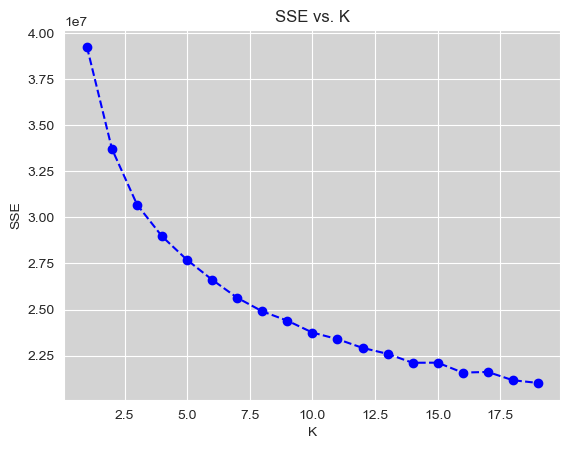

In [48]:
# Investigate the change in within-cluster distance across number of clusters.


plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K')

In [49]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans = KMeans(n_clusters = 12,n_init=12)
model_fin = kmeans.fit(df_pca)
genpop_pred = model_fin.predict(df_pca)

### Discussion 3.1: Apply Clustering to General Population

Based on the elbow method, which helps determine the optimal number of clusters for a clustering algorithm, I identified that the best number of clusters for general population data is 12. The elbow method is a valuable technique for finding an appropriate cluster count, and it suggests that partitioning the data into 11 (or 12, considering the one-based numbering) distinct groups provides meaningful and well-defined clusters.

<a id='step3.2'></a>
### Step 3.2: Apply All Steps to the Customer Data



In [101]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',sep = ';')

In [102]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
import warnings
warnings.filterwarnings('ignore')
#cleaning
cust_clean=clean_data(customers)
#treat missing values
#cust_clean[cust_clean.columns] = imputer.fit_transform(cust_clean)
cust_imputer = imputer.transform(cust_clean)


In [104]:
# Apply feature scaling
cust_scaled = scaler.transform(cust_imputer)
cust_scaled = pd.DataFrame(cust_scaled, columns=df_clean_f.columns)

# PCA
cust_pca = pca.transform(cust_scaled)

# Predictions
cust_pred = kmeans.predict(cust_pca)

<a id='step3.3'></a>
### Step 3.3: Compare Customer Data to Demographics Data



In [105]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
clust_df= pd.DataFrame(columns = ['azdias', 'customers','delta','cluster_num'])
for i in range(1, 12):
    clust_df.loc[i - 1] = [round((genpop_pred == i).sum() / len(genpop_pred)*100,2), 
                           round((cust_pred == i).sum() / len(cust_pred)*100,2),
                           round((cust_pred == i).sum() / len(cust_pred)*100,2)- round(
                               (genpop_pred == i).sum() / len(genpop_pred)*100,2),i]
#add additional cluster representong rows with highest number of missing values per row    
clust_df.loc[11]=[round(len(df2) / len(azdias)*100,2), round((1-(len(cust_clean) / len(customers)))*100,2),
                  round((1-(len(cust_clean) / len(customers)))*100,2) - round(len(df2) / len(azdias)*100,2),12]
clust_df['cluster_num'] = clust_df['cluster_num'].astype('Int64')
clust_df

,azdias,customers,delta,cluster_num
0,5.41,3.72,-1.69,1
1,9.85,8.18,-1.67,2
2,7.77,1.96,-5.81,3
3,12.35,10.38,-1.97,4
4,7.86,32.15,24.29,5
5,8.69,0.93,-7.76,6
6,0.41,1.97,1.56,7
7,10.46,7.23,-3.23,8
8,10.83,19.53,8.70,9
9,7.41,11.51,4.10,10


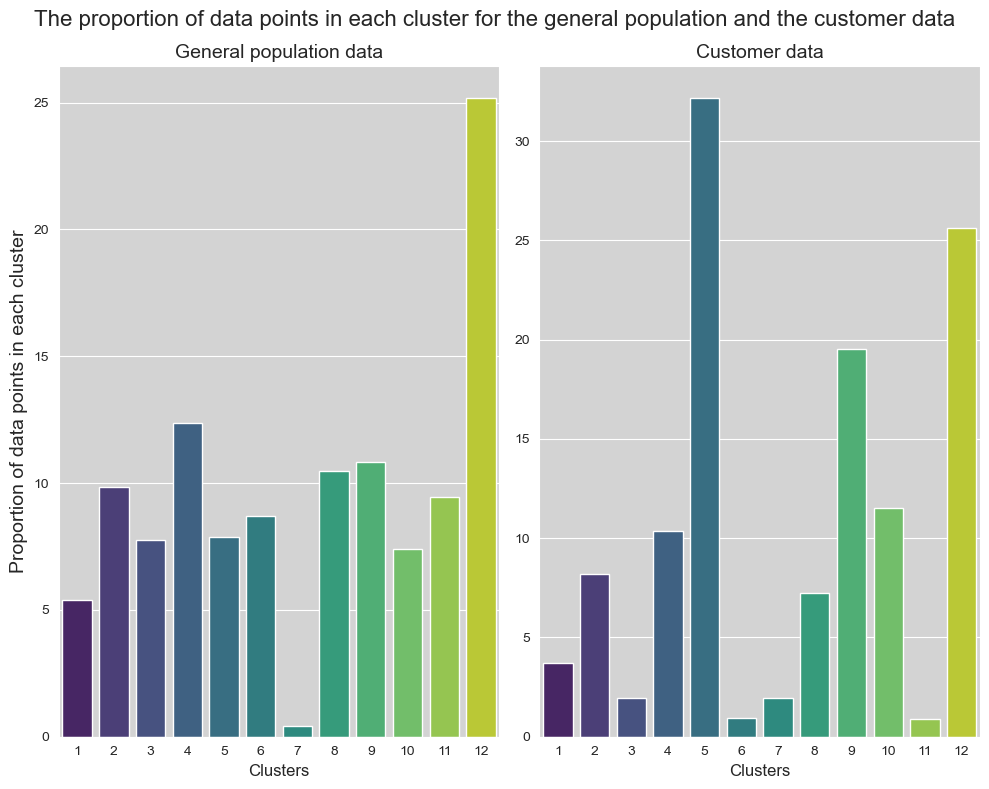

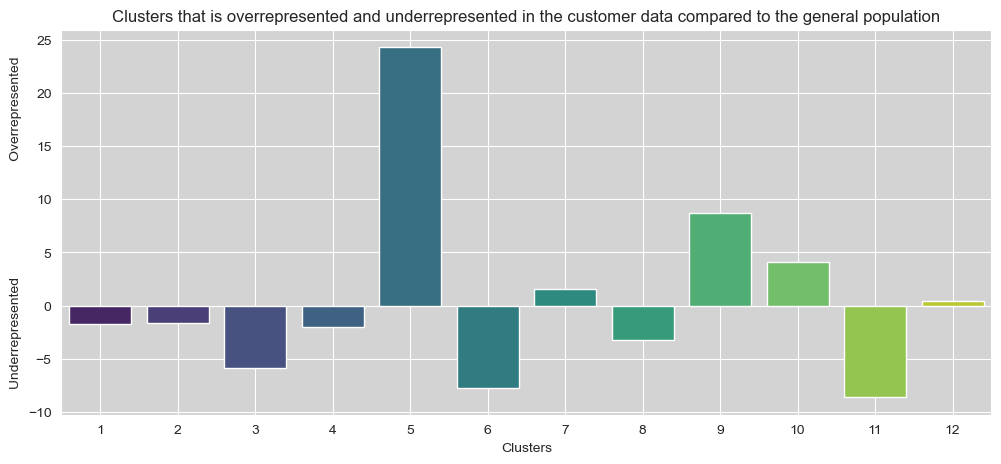

In [106]:
# Plot the bar plot

fig, axes = plt.subplots(1, 2, figsize=(10, 8))
# Plot 'azdias' and 'customers' for each cluster
ax1=sns.barplot(data=clust_df, x='cluster_num', y='azdias',ax=axes[0], palette='viridis')
ax1.set_title("General population data", fontsize=14)
ax1.set_xlabel("Clusters", fontsize=12)
ax1.set_ylabel("Proportion of data points in each cluster", fontsize=14)

ax2=sns.barplot(data=clust_df, x='cluster_num', y='customers', ax=axes[1], palette='viridis')
ax2.set_title("Customer data", fontsize=14)
ax2.set_xlabel("Clusters", fontsize=12)
ax2.set_ylabel("")


#master title
fig.suptitle("The proportion of data points in each cluster for the general population and the customer data", fontsize=16)
plt.tight_layout()  
plt.show()
#Clusters that is overrepresented and underrepresented in the customer data compared to the general population plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=clust_df, x='cluster_num', y='delta', palette='viridis')

plt.title("Clusters that is overrepresented and underrepresented in the customer data compared to the general population")
plt.xlabel("Clusters")
plt.ylabel("Underrepresented                              Overrepresented")
plt.xticks(rotation=0)
plt.grid(True)

plt.show()

In [107]:
#recreate data for clusters
scaled_pca_space = pca.inverse_transform(model_fin.cluster_centers_)

original_feature_space = scaler.inverse_transform(scaled_pca_space)

centroid_df = pd.DataFrame(data=original_feature_space, columns=cust_clean.columns)



In [108]:
centroid_df

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,JUGENDJAHRE,BEWEGUNG,VERMOGEN,LEBENSPHASEN
0,1.646230,1.985151,2.297005,3.961933,2.260868,4.402882,3.815459,2.915171,0.205179,2.236487,...,0.258051,3.534060,3.929948,2.754966,3.929900,2.525345,5.669122,0.205179,2.512648,3.265239
1,3.477391,1.826320,2.336515,2.054985,4.098314,2.180390,1.607432,4.438601,0.037843,2.086014,...,1.625037,3.770374,2.272261,3.611070,7.395610,3.568369,3.592229,0.037843,4.497902,2.565424
2,3.520282,1.922742,3.643267,1.831081,4.111963,2.876126,1.922339,2.918288,0.003297,2.093615,...,0.157308,3.301592,3.851148,2.637572,3.228497,2.316750,3.638844,0.003297,2.564583,3.293923
3,1.774584,0.977067,2.950517,4.080404,2.185685,3.851819,3.971413,2.443254,0.308877,2.183348,...,0.274173,3.553464,3.908015,2.806459,4.065886,2.587246,5.694888,0.308877,2.556917,3.217016
4,3.370840,1.030693,3.335842,1.962399,4.188540,1.588446,1.737627,3.561153,0.078875,2.418493,...,1.142994,3.747806,2.874538,3.630237,6.574333,3.716545,3.538697,0.078875,4.280784,2.381363
5,3.311501,1.052497,4.828055,1.634045,4.192081,1.515068,2.150578,1.916592,0.989502,2.089870,...,0.376508,3.686097,3.898707,3.005340,5.307991,2.903680,3.610671,0.989502,2.104344,3.628193
6,1.829725,0.957423,1.908857,4.314305,2.121407,3.504385,3.693313,3.612935,0.121143,2.384659,...,1.324591,3.751184,2.634686,3.709749,7.029348,3.732524,5.687953,0.121143,4.428609,1.962356
7,3.114544,1.456217,3.613572,1.981150,3.953802,2.027985,2.181893,3.115451,0.707409,2.103300,...,0.820320,3.757833,3.331096,3.125381,5.876380,3.157647,3.704339,0.707409,2.903476,3.389304
8,3.540151,1.977797,2.529122,1.982177,4.195715,2.356116,1.846771,4.251393,0.065313,2.007654,...,0.972548,3.720523,3.061850,3.602583,6.225327,3.668191,3.495405,0.065313,4.112331,2.645342
9,3.314453,1.089887,4.460711,1.783315,4.158351,2.206044,1.840702,2.192246,0.001699,2.384346,...,0.179826,3.322943,3.843710,2.656172,3.324563,2.370007,3.647291,0.001699,2.541287,3.267078


In [109]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

#print the most overrepresented cluster
print(centroid_df.loc[4].head(60).round(1))
print(centroid_df.loc[4].tail(5).round(1))

ALTERSKATEGORIE_GROB        3.4
ANREDE_KZ                   1.0
FINANZ_MINIMALIST           3.3
FINANZ_SPARER               2.0
FINANZ_VORSORGER            4.2
FINANZ_ANLEGER              1.6
FINANZ_UNAUFFAELLIGER       1.7
FINANZ_HAUSBAUER            3.6
GREEN_AVANTGARDE            0.1
HEALTH_TYP                  2.4
RETOURTYP_BK_S              4.4
SEMIO_SOZ                   5.0
SEMIO_FAM                   5.2
SEMIO_REL                   3.7
SEMIO_MAT                   4.2
SEMIO_VERT                  5.8
SEMIO_LUST                  5.1
SEMIO_ERL                   4.2
SEMIO_KULT                  5.0
SEMIO_RAT                   2.6
SEMIO_KRIT                  3.7
SEMIO_DOM                   3.4
SEMIO_KAEM                  2.9
SEMIO_PFLICHT               3.2
SEMIO_TRADV                 2.9
SOHO_KZ                     0.0
VERS_TYP                    1.7
ANZ_PERSONEN                1.5
ANZ_TITEL                  -0.0
HH_EINKOMMEN_SCORE          5.4
W_KEIT_KIND_HH              4.9
WOHNDAUE

In [110]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

print(centroid_df.loc[10].head(60).round(1))
print(centroid_df.loc[10].tail(5).round(1))

ALTERSKATEGORIE_GROB        3.4
ANREDE_KZ                   2.0
FINANZ_MINIMALIST           4.1
FINANZ_SPARER               1.7
FINANZ_VORSORGER            4.1
FINANZ_ANLEGER              2.2
FINANZ_UNAUFFAELLIGER       2.2
FINANZ_HAUSBAUER            2.4
GREEN_AVANTGARDE            1.0
HEALTH_TYP                  2.1
RETOURTYP_BK_S              3.5
SEMIO_SOZ                   3.2
SEMIO_FAM                   2.0
SEMIO_REL                   2.1
SEMIO_MAT                   2.3
SEMIO_VERT                  3.1
SEMIO_LUST                  5.2
SEMIO_ERL                   6.3
SEMIO_KULT                  2.0
SEMIO_RAT                   3.5
SEMIO_KRIT                  5.7
SEMIO_DOM                   6.1
SEMIO_KAEM                  5.9
SEMIO_PFLICHT               3.0
SEMIO_TRADV                 2.8
SOHO_KZ                     0.0
VERS_TYP                    1.5
ANZ_PERSONEN                2.3
ANZ_TITEL                   0.0
HH_EINKOMMEN_SCORE          2.4
W_KEIT_KIND_HH              3.8
WOHNDAUE

### Discussion 3.3: Compare Customer Data to Demographics Data


| Feature | Description|Overrepresented cluster| Underrepresented cluster |Note|
|:- |:- |:- | :- |:- |
| ALTERSKATEGORIE_GROB   |Estimated age based on given name |3.4   | 3.4     |similar|
| ANREDE_KZ              | Gender|1.0   | 2.0     |important|
| FINANZ_MINIMALIST      | Low financial interest Financial typology|3.3   | 4.1     |not important|
| FINANZ_SPARER          | Money-saver Financial typology|2.0   | 1.7     |similar|
| FINANZ_VORSORGER       | Be prepared Financial typology|4.2   | 4.1     |similar|
| FINANZ_ANLEGER         | Investor Financial typology| 1.6   | 2.2     |similar|
| FINANZ_UNAUFFAELLIGER  | Inconspicuous Financial typology| 1.7   | 2.2     |similar|
| FINANZ_HAUSBAUER       | Home ownership Financial typology| 3.6   | 2.4     |important(for underrepresented)|
| GREEN_AVANTGARDE       | Membership in environmental sustainability as part of youth| 0.1   | 1.0     |important|
| HEALTH_TYP             | Health typology| 2.4   | 2.1     |similar|
| RETOURTYP_BK_S         | Return type| 4.4   | 3.5     |important|
| SEMIO_SOZ              | Socially-minded Personality typology| 5.0   | 3.2     |important(for underrepresented)|
| SEMIO_FAM              | Family-minded Personality typology| 5.2   | 2.0     |important(for underrepresented)|
| SEMIO_REL              | Religious Personality typology| 3.7   | 2.1     |important(for underrepresented)|
| SEMIO_MAT              | Materialistic Personality typology| 4.2   | 2.3     |important(for underrepresented)|
| SEMIO_VERT             | Dreamful Personality typology| 5.8   | 3.1     |important(for underrepresented)|
| SEMIO_LUST             | Sensual-minded Personality typology| 5.1   | 5.2     |similar|
| SEMIO_ERL              | Event-oriented Personality typology| 4.2   | 6.3     |not important|
| SEMIO_KULT             | Cultural-minded Personality typology| 5.0   | 2.0     |important(for underrepresented)|
| SEMIO_RAT              | Rational-minded Personality typology| 2.6   | 3.5     |important(for overrepresented)|
| SEMIO_KRIT             | Critical-minded Personality typology| 3.7   | 5.7     |not important|
| SEMIO_DOM              | Dominant-minded Personality typology| 3.4   | 6.1     |important(for overrepresented)|
| SEMIO_KAEM             | Combative attitude Personality typology| 2.9   | 5.9     |important(for overrepresented)|
| SEMIO_PFLICHT          | Dutiful Personality typology| 3.2   | 3.0     |similar|
| SEMIO_TRADV            | Tradional-minded Personality typology| 2.9   | 2.8     |similar|
| SOHO_KZ                | Small office / home office flag| 0.0   | 0.0     |similar|
| VERS_TYP               | Insurance typology| 1.7   | 1.5     |similar|
| ANZ_PERSONEN           | Number of adults in household| 1.5   | 2.3     |similar|
| ANZ_TITEL              | Number of professional academic title holders in household| -0.0  | 0.0     |similar|
| HH_EINKOMMEN_SCORE     | Estimated household net income| 5.4   | 2.4     |important|
| W_KEIT_KIND_HH         | Likelihood of children in household| 4.9   | 3.8     |important|
| WOHNDAUER_2008         | Length of residence| 8.2   | 8.5     |similar|
| ANZ_HAUSHALTE_AKTIV    | Number of households in the building| 11.3  | 1.8     |important|
| ANZ_HH_TITEL           | Number of professional academic title holders in building| 0.0   | 0.0     |similar|
| GEBAEUDETYP            | Type of building (residential vs. commercial)| 3.3   | 2.2     |important|
| KONSUMNAEHE            | Distance from building to PoS| 2.2   | 3.4     |important|
| MIN_GEBAEUDEJAHR       | First year building was mentioned in the database| 1992.4| 1992.7  |similar|
| OST_WEST_KZ            | Building location(GDR / FRG)| 0.8   | 0.9     |similar|
| KBA05_ANTG1            | Number of 1-2 family houses(microcell)| 0.4   | 2.8     |important|
| KBA05_ANTG2            | Number of 3-5 family houses(microcell)| 1.4   | 1.1     |similar|
| KBA05_ANTG3            | Number of 6-10 family houses(microcell)| 1.2   | 0.1     |important|
| KBA05_ANTG4            | Number of 10+ family houses(microcell)| 0.5   | 0.0     |similar|
| KBA05_GBZ              | Number of buildings(microcell)| 2.3   | 4.1     |important|
| BALLRAUM               | Distance to nearest urban center| 3.4   | 4.1     |important|
| EWDICHTE               | Density of households per km^2| 4.9   | 3.9     |important|
| INNENSTADT             | Distance to city center| 3.6   | 4.7     |important|
| GEBAEUDETYP_RASTER     | Ratio of residential to commercial activity| 3.5   | 4.0     |similar|
| KKK                    | Purchasing power in region| 2.9   | 2.2     |important|
| MOBI_REGIO             | Movement patterns| 1.9   | 4.2     |important|
| ONLINE_AFFINITAET      | Online affinity| 1.8   | 3.3     |important|
| REGIOTYP               | Neighborhood typology| 4.9   | 3.6     |important|
| KBA13_ANZAHL_PKW       | Number of cars(PLZ8)| 549.9 | 697.9   |important|
| PLZ8_ANTG1             | Number of 1-2 family houses(PLZ8)| 1.6   | 2.8     |important(for underrepresented)|
| PLZ8_ANTG2             | Number of 3-5 family houses(PLZ8)| 3.4   | 2.5     |similar|
| PLZ8_ANTG3             | Number of 6-10 family houses(PLZ8)| 2.3   | 1.2     |not important|
| PLZ8_ANTG4             | Number of 10+ family houses(PLZ8)| 1.1   | 0.4     |important(for underrepresented)|
| PLZ8_HHZ               | Number of households(PLZ8)| 3.7   | 3.7     |similar|
| PLZ8_GBZ               | Number of buildings(PLZ8)| 2.9   | 3.9     |important|
| ARBEIT                 | Share of unemployment| 3.6   | 3.0     |important|
| ORTSGR_KLS9            | Size of community| 6.6   | 2.8     |important|
| RELAT_AB               | Share of unemployment relative to county| 3.7   | 3.0     |important|
| JUGENDJAHRE            | person's youth decade| 3.5   | 3.7     |similar|
| BEWEGUNG               | Dominating movement of person's youth| 0.1   | 1.0     |important|
| VERMOGEN               | Wealth Typology| 4.3   | 2.0     |important|
| LEBENSPHASEN           | Life Stage Typology| 2.4   | 3.6     |important|

Key points for target group(overrepresented):

Demographics:

- Gender: Male
Environmental & Lifestyle Factors:

- Membership in Green Avantgarde: Not a member of Green Avantgarde
- Personality Typology:
    - Rational-minded: High affinity
    - Dominant-minded: High affinity
    - Combative attitude: High affinity

Household & Income:

- Estimated Household Net Income: Lower income
- Likelihood of Children in Household: Unlikely

Housing & Building Type:

- Number of Households in the Building: 11 (Apartment building)
- Type of Building: Mixed (Residential and company building)

Geographical Proximity:

- Distance from Building to the point of sale: Located in a 250 x 250m grid cell with at least one Point of Sale (PoS)

Microcell Characteristics:

- Number of 1-2 Family Houses: No 1-2 family homes
- Number of 6-10 Family Houses: Lower share of 6-10 family homes
- Number of Buildings: 3-4 buildings

Urban Environment:

- Distance to Nearest Urban Center: 20 - 30 km
- The density of Households per Square Kilometer: 320 - 999 households per km^2
- Distance to City Center: 5 - 10 km to the city center

Movement Patterns & Lifestyle:

- Movement Patterns: High movement

Neighborhood & Community:

- Neighborhood Typology: Lower middle class
- Size of Community: 100,001 to 300,000 inhabitants
- Share of Unemployment in Community: High
- Share of Unemployment Relative to County: High

Life Stage & Wealth Typology:

- Dominating Movement of Person's Youth: Mainstream
- Wealth Typology: Less Affluent Households
- Life Stage Typology: Young Couples with Children

The identified customer segment represents a specific group with unique characteristics. These customers tend to be male and exhibit traits associated with rational-minded, dominant-minded, and combative attitude personality types. They are unlikely to be members of Green Avantgarde, indicating a lower affinity towards environmental sustainability movements.

In terms of household type and income, this segment is characterized by a lower net income and an unlikely likelihood of having children in the household. They prefer apartments in mixed buildings (residential and company).

Geographically, this segment resides in areas with a moderate distance from urban centers (20 - 30 km) and an average household density (320 - 999 households per km^2). They show a high movement pattern, suggesting a more active lifestyle.

Socioeconomically, this customer segment belongs to the lower middle class and resides in communities with significant population size (100,001 to 300,000 inhabitants). However, there is a higher share of unemployment both at the community level and relative to the county.

In terms of life stage, this segment consists mainly of young couples with children. Their dominating movement during their youth is mainstream, indicating a preference for more conventional and established practices.

Considering the characteristics of this customer segment, businesses can tailor their marketing and service offerings to cater specifically to the needs and preferences of these customers. For instance, offering affordable products or services with family-oriented appeals and targeting locations close to urban centers can be effective strategies to engage with this customer segment. Additionally, businesses can consider promotions or incentives to attract lower-income customers while providing convenience in proximity to their residences.

Segments of the population that are relatively unpopular with the mail-order company key points:

Demographics & Lifestyle:
- Gender: Female
- Membership in Green Avantgarde: Member of Green Avantgarde (Part of the environmental sustainability movement)
- Personality Typology:
    - Socially-minded: High affinity
    - Family-minded: Very high affinity
    - Religious: Very high affinity
    - Materialistic: Very high affinity
    - Dreamful: High affinity
    - Cultural-minded: Very high affinity

Household & Income:
- Home Ownership Financial Typology: High
- Estimated Household Net Income: Very high income
- Number of Households in the Building: 2 (House or townhouse)
- Type of Building: Residential building without actually known household

Geographical Proximity:
- Distance from Building to the point of Sale: Located in a 500 x 500m grid cell with at least one Point of Sale (PoS)

Microcell Characteristics:
- Number of 1-2 Family Houses: High share of 1-2 family homes
- Number of 6-10 Family Houses: No 6-10 family homes
- Number of Buildings: 17-22 buildings

Urban Environment:
- Distance to Nearest Urban Center: 30 - 40 km
- The density of Households per Square Kilometer: 150 - 319 households per km^2
- Distance to City Center: 10 - 20 km to the city center

Purchasing Power & Lifestyle:
- Purchasing Power in Region: High
- Movement Patterns: Low movement
- Online Affinity: High

Neighborhood & Community:
- Neighborhood Typology: Middle class
- Size of Community: 5,001 to 10,000 inhabitants
- Share of Unemployment Relative to County: Average

Life Stage & Wealth Typology:
- Dominating Movement of Person's Youth: Avantgarde
- Wealth Typology: Prosperous Households
- Life Stage Typology: Older Families & Mature Couples


The identified segments represent groups of customers with distinct characteristics that make them relatively unpopular with the mail-order company. These customers are predominantly female and actively engage in environmental sustainability as members of the Green Avantgarde movement. Despite their high purchasing power and very high household net income, they exhibit a preference for specific lifestyle and housing choices.
The identified segments tend to reside in residential buildings without known households and are located relatively far from urban centers (30 - 40 km). They prefer areas with moderate household densities (150 - 319 households per km^2) and exhibit low movement patterns, indicating a preference for settled lifestyles.
Their online affinity is high, suggesting they are receptive to online channels for shopping and information. Despite this, they are relatively less engaged with the mail-order company, possibly due to a lack of targeted offerings or promotions catering to their lifestyle preferences.
To attract and engage with these relatively unpopular segments, the mail-order company can consider tailoring its product offerings and marketing campaigns to align with its personality typologies, lifestyle choices, and values. Additionally, providing personalized offers, especially for housing-related products and services, may resonate better with these segments.
Furthermore, the company can explore partnerships or collaborations with environmentally sustainable brands or organizations to enhance their appeal to the Green Avantgarde members within these segments. Leveraging online platforms and social media channels to reach out to these customers with tailored content and promotions can also help improve engagement.
By understanding these segments' distinct characteristics and preferences, the mail-order company can implement targeted strategies that resonate with their needs, ultimately driving customer loyalty and satisfaction among these relatively unpopular segments.

https://www.freecodecamp.org/news/sort-dictionary-by-value-in-python/<br>
https://www.geeksforgeeks.org/how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-pandas/<br>